In [1]:
from astropy.table import Table

import numpy as np

import sys
sys.path.insert(1, '/Users/kellydouglass/Documents/Research/Rotation_curves/RotationCurves/spirals/')
from dark_matter_mass_v1 import rot_fit_BB

import matplotlib.pyplot as plt

In [6]:
H_0 = 100      # Hubble's Constant in units of h km/s/Mpc
c = 299792.458 # Speed of light in units of km/s

fHe = 0.25 # fraction of He

# Data

In [3]:
data_filename = '../../Nitya_Ravi/master_table_Halpha_BB_HI_H2_MxCG_R90_CMD_ZPG16R_SFR_MZ_phi.txt'

data = Table.read(data_filename, format='ascii.commented_header')

In [5]:
################################################################################
# Calculate the velocity at R90, Rmax
#-------------------------------------------------------------------------------
# Convert r from arcsec to kpc
#-------------------------------------------------------------------------------
dist_to_galaxy_Mpc = c*data['NSA_redshift']/H_0
dist_to_galaxy_kpc = dist_to_galaxy_Mpc*1000

data['R90_kpc'] = dist_to_galaxy_kpc*np.tan(data['NSA_elpetro_th90']*(1./60)*(1./60)*(np.pi/180))
#-------------------------------------------------------------------------------

data['V90_kms'] = rot_fit_BB(data['R90_kpc'], 
                             [data['Vmax_map'], 
                              data['Rturn_map'], 
                              data['alpha_map']])

data['VRmax_kms'] = rot_fit_BB(data['Rmax'], 
                               [data['Vmax_map'], 
                                data['Rturn_map'], 
                                data['alpha_map']])
################################################################################

### Calculate mass ratios

In [7]:
data['M90_Mdisk_ratio'] = 10**(data['M90_map'] - data['M90_disk_map'])

data['M90_MdiskHI_ratio'] = 10**data['M90_map']/(10**data['M90_disk_map'] + 10**data['logHI'])

data['M90_MdiskHIH2_ratio'] = 10**data['M90_map']/(10**data['M90_disk_map'] + 10**data['logHI'] + 10**data['logH2_CG'])
data['M90_MdiskHIH2_ratio'][data['logH2_M'] > 0] = 10**data['M90_map'][data['logH2_M'] > 0]/(10**data['M90_disk_map'][data['logH2_M'] > 0] + 10**data['logHI'][data['logH2_M'] > 0] + 10**data['logH2_M'][data['logH2_M'] > 0])

data['logH'] = np.log10(10**data['logHI'] + 10**data['logH2_CG'])
data['logH'][data['logH2_M'] > 0] = np.log10(10**data['logHI'][data['logH2_M'] > 0] + 10**data['logH2_M'][data['logH2_M'] > 0])

data['logHe'] = np.log10((fHe/(1 - fHe))*10**data['logH'])

data['Mgas'] = np.log10(10**data['logH'] + 10**data['logHe'])

data['M90_Mgas_ratio'] = 10**(data['M90_map'] - data['Mgas'])

data['M90_vis'] = np.log10(10**data['M90_disk_map'] + 10**data['Mgas'] + data['M_Z'])

/var/folders/5x/2533z9ns34n_8ghxd5f6hl0c0000gn/T/ipykernel_8023/1709941829.py:1: RuntimeWarning: overflow encountered in power
  data['M90_Mdisk_ratio'] = 10**(data['M90_map'] - data['M90_disk_map'])
/var/folders/5x/2533z9ns34n_8ghxd5f6hl0c0000gn/T/ipykernel_8023/1709941829.py:3: RuntimeWarning: divide by zero encountered in divide
  data['M90_MdiskHI_ratio'] = 10**data['M90_map']/(10**data['M90_disk_map'] + 10**data['logHI'])
/var/folders/5x/2533z9ns34n_8ghxd5f6hl0c0000gn/T/ipykernel_8023/1709941829.py:3: RuntimeWarning: invalid value encountered in divide
  data['M90_MdiskHI_ratio'] = 10**data['M90_map']/(10**data['M90_disk_map'] + 10**data['logHI'])
/var/folders/5x/2533z9ns34n_8ghxd5f6hl0c0000gn/T/ipykernel_8023/1709941829.py:5: RuntimeWarning: divide by zero encountered in divide
  data['M90_MdiskHIH2_ratio'] = 10**data['M90_map']/(10**data['M90_disk_map'] + 10**data['logHI'] + 10**data['logH2_CG'])
/var/folders/5x/2533z9ns34n_8ghxd5f6hl0c0000gn/T/ipykernel_8023/1709941829.py:5: Ru

In [8]:
bad_boolean = np.logical_or.reduce([data['M90_map'] == -999, 
                                    data['M90_disk_map'] == -999, 
                                    data['alpha_map'] > 99, 
                                    data['V90_kms'] < 10, 
                                    data['V90_kms'] > 1000, 
                                    data['Vmax_err_map']/data['Vmax_map'] > 2])

good_galaxies = data[~bad_boolean]

print(len(good_galaxies))

5548


In [9]:
good_galaxies[:10]

<Table length=10>
MaNGA_plate MaNGA_IFU NSA_plate NSA_fiberID NSA_MJD NSA_index NSA_ID       NSA_RA       ... M90_MdiskHI_ratio  M90_MdiskHIH2_ratio        logH              logHe              Mgas          M90_Mgas_ratio        M90_vis      
   int64      int64     int64      int64     int64    int64   int64       float64       ...      float64             float64            float64            float64           float64            float64            float64      
----------- --------- --------- ----------- ------- --------- ------ ------------------ ... ------------------ ------------------- ------------------ ----------------- ------------------ ------------------ ------------------
      10001     12701       448         450   51900     48157  51226  133.3710906116639 ...  1.285718492766735   1.285718492766735 10.350040435791016 9.872919181071353 10.474979172399316 1.4523676405070516 10.614737262597885
      10001     12702       448         524   51900     48188  51261 133.68566986867248 ... 2.3216867696440326  2.3216867696440326  9.583724021911621 9.106602767191958  9.708662758519921  7.787073094719339 10.265454582471065
      10001     12703       483         535   51924     55648  59078 136.01715996919202 ...  5.107080956141079   5.107080956141079  9.775858879089355 9.298737624369693  9.900797615697655 26.440826295957915 10.635380442311975
      10001     12704       483         456   51924     55616  59044 133.98996686918764 ... 2.3562588426176956  2.3562588426176956  9.239542007446289 8.762420752726626  9.364480744054589  10.21046608992867 10.025662634090253
      10001     12705       484         281   51907     55784  59219  136.7513745097166 ... 11.528374873022763  11.528374873022763  9.864717483520508 9.387596228800845  9.989656220128808  44.29290778524042 10.601600052724075
      10001      1901       483         220   51924     55567  58994  133.3300280089807 ...  2.983710265859335   2.983710265859335               -inf              -inf               -inf                inf  9.554971850561376
      10001      3702       448         414   51900     48136  51205 132.91276824299706 ...  8.018086531100149   7.721843737248145   8.77132441413365 8.294203159413987   8.89626315074195 156.74915782716218 10.209063290327691
      10001      3703       483         441   51924     55612  59040  134.5914989461959 ...  2.324747265156758   2.324747265156758               -inf              -inf               -inf                inf 10.095863516472278
      10001      6102       448         372   51900     48116  51184  132.6539916973944 ...  5.782668277347417   5.782668277347417  9.562195777893066 9.085074523173404  9.687134514501366  59.97783476550766 10.713340807291706
      10001      9101       448         525   51900     48189  51262 133.87809679040268 ... 17.600142299211385  17.600142299211385 10.157633781433105 9.680512526713443 10.282572518041405    25.947981106688 10.519186653124736

### Pull out those objects with HI observations

In [10]:
HI_boolean = np.logical_or(good_galaxies['logHI'] == -99, good_galaxies['logHI'] == -999)

goodHI_galaxies = good_galaxies[~HI_boolean]

print(len(goodHI_galaxies))

2598


### Pull out those objects with HI and CO observations

In [15]:
H2_boolean = (goodHI_galaxies['logH2_M'] == -999) & (goodHI_galaxies['logH2_CG'] == -999)

goodH2_galaxies = goodHI_galaxies[~H2_boolean]

print(len(goodH2_galaxies))

115


### Separate by CMD classification

In [11]:
BC_boolean = good_galaxies['CMD_class'] == 1
GV_boolean = good_galaxies['CMD_class'] == 2
RS_boolean = good_galaxies['CMD_class'] == 3

BC = good_galaxies[BC_boolean]
GV = good_galaxies[GV_boolean]
RS = good_galaxies[RS_boolean]

print('Blue cloud:', len(BC))
print('Green valley:', len(GV))
print('Red sequence:', len(RS))

Blue cloud: 3036
Green valley: 1443
Red sequence: 512


In [16]:
BC_HI_boolean = goodHI_galaxies['CMD_class'] == 1
GV_HI_boolean = goodHI_galaxies['CMD_class'] == 2
RS_HI_boolean = goodHI_galaxies['CMD_class'] == 3

BC_HI = goodHI_galaxies[BC_HI_boolean]
GV_HI = goodHI_galaxies[GV_HI_boolean]
RS_HI = goodHI_galaxies[RS_HI_boolean]

print('Blue cloud:', len(BC_HI))
print('Green valley:', len(GV_HI))
print('Red sequence:', len(RS_HI))

Blue cloud: 1750
Green valley: 440
Red sequence: 122


In [18]:
BC_H2_boolean = goodH2_galaxies['CMD_class'] == 1
GV_H2_boolean = goodH2_galaxies['CMD_class'] == 2
RS_H2_boolean = goodH2_galaxies['CMD_class'] == 3

BC_H2 = goodH2_galaxies[BC_H2_boolean]
GV_H2 = goodH2_galaxies[GV_H2_boolean]
RS_H2 = goodH2_galaxies[RS_H2_boolean]

print('Blue cloud:', len(BC_H2))
print('Green valley:', len(GV_H2))
print('Red sequence:', len(RS_H2))

Blue cloud: 77
Green valley: 27
Red sequence: 6


# Sample rotation curves

In [19]:
radii_max = np.linspace(0,1,100)

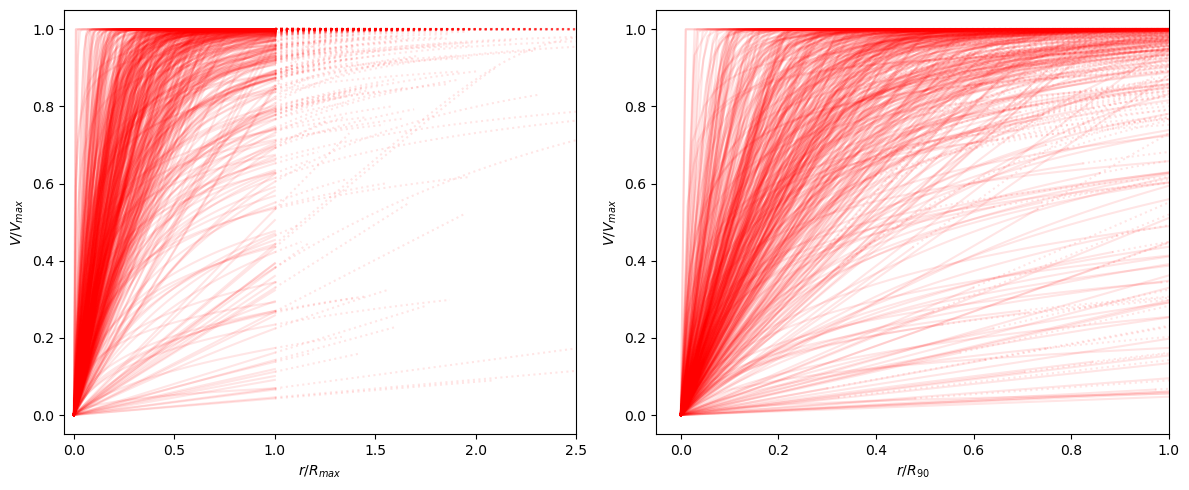

In [21]:
plt.figure(figsize=(12,5), tight_layout=True)


plt.subplot(121)

for i in range(len(RS)):
    alpha = RS['alpha_map'][i]
    Rturn = RS['Rturn_map'][i]
    Rmax = RS['Rmax'][i]
    R90 = RS['R90_kpc'][i]
    
    Vr_max = radii_max*Rmax/(Rturn**alpha + (radii_max*Rmax)**alpha)**(1/alpha)
    
    plt.plot(radii_max, Vr_max, 'r', alpha=0.1)
    
    if R90 > Rmax:
        radii_90 = np.linspace(1,R90/Rmax,50)
        Vr_90 = radii_90*Rmax/(Rturn**alpha + (radii_90*Rmax)**alpha)**(1/alpha)
        plt.plot(radii_90, Vr_90, 'r:', alpha=0.1)

plt.xlim([-0.05, 2.5])

plt.xlabel('$r/R_{max}$')
plt.ylabel('$V/V_{max}$')



plt.subplot(122)

for i in range(len(RS)):
    alpha = RS['alpha_map'][i]
    Rturn = RS['Rturn_map'][i]
    Rmax = RS['Rmax'][i]
    R90 = RS['R90_kpc'][i]
    
    r_Rmax = np.linspace(0,Rmax/R90,50)
    
    Vr_max = r_Rmax*R90/(Rturn**alpha + (r_Rmax*R90)**alpha)**(1/alpha)
    
    plt.plot(r_Rmax, Vr_max, 'r', alpha=0.1)
    
    if R90 > Rmax:
        r_R90 = np.linspace(Rmax/R90,1,50)
        Vr_90 = r_R90*R90/(Rturn**alpha + (r_R90*R90)**alpha)**(1/alpha)
        plt.plot(r_R90, Vr_90, 'r:', alpha=0.1)


plt.xlim([-0.05, 1])

plt.xlabel('$r/R_{90}$')
plt.ylabel('$V/V_{max}$');

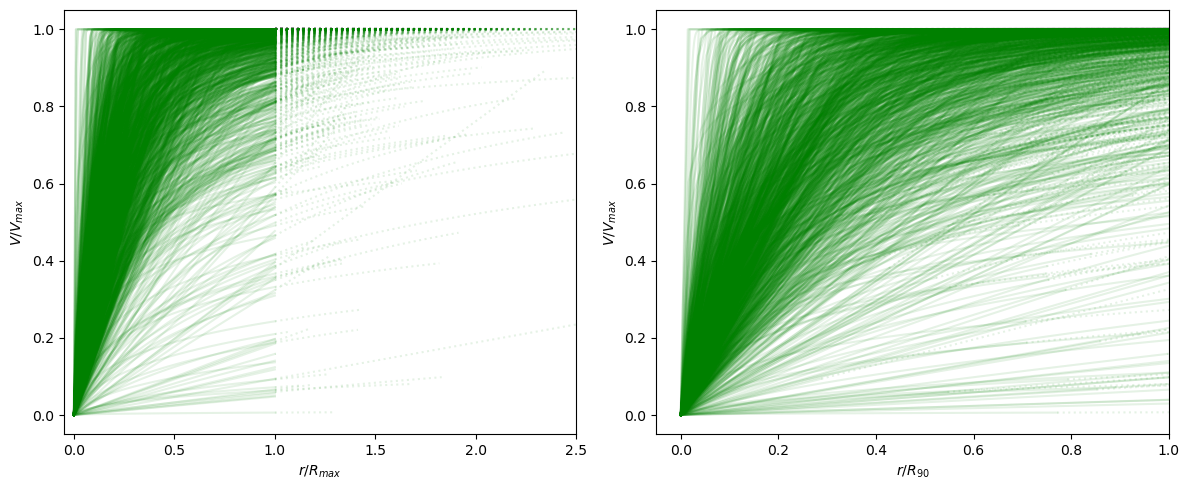

In [22]:
plt.figure(figsize=(12,5), tight_layout=True)


plt.subplot(121)

for i in range(len(GV)):
    alpha = GV['alpha_map'][i]
    Rturn = GV['Rturn_map'][i]
    Rmax = GV['Rmax'][i]
    R90 = GV['R90_kpc'][i]
    
    Vr_max = radii_max*Rmax/(Rturn**alpha + (radii_max*Rmax)**alpha)**(1/alpha)
    
    plt.plot(radii_max, Vr_max, 'g', alpha=0.1)
    
    if R90 > Rmax:
        radii_90 = np.linspace(1,R90/Rmax,50)
        Vr_90 = radii_90*Rmax/(Rturn**alpha + (radii_90*Rmax)**alpha)**(1/alpha)
        plt.plot(radii_90, Vr_90, 'g:', alpha=0.1)

plt.xlim([-0.05, 2.5])

plt.xlabel('$r/R_{max}$')
plt.ylabel('$V/V_{max}$')



plt.subplot(122)

for i in range(len(GV)):
    alpha = GV['alpha_map'][i]
    Rturn = GV['Rturn_map'][i]
    Rmax = GV['Rmax'][i]
    R90 = GV['R90_kpc'][i]
    
    r_Rmax = np.linspace(0,Rmax/R90,50)
    
    Vr_max = r_Rmax*R90/(Rturn**alpha + (r_Rmax*R90)**alpha)**(1/alpha)
    
    plt.plot(r_Rmax, Vr_max, 'g', alpha=0.1)
    
    if R90 > Rmax:
        r_R90 = np.linspace(Rmax/R90,1,50)
        Vr_90 = r_R90*R90/(Rturn**alpha + (r_R90*R90)**alpha)**(1/alpha)
        plt.plot(r_R90, Vr_90, 'g:', alpha=0.1)


plt.xlim([-0.05, 1])

plt.xlabel('$r/R_{90}$')
plt.ylabel('$V/V_{max}$');

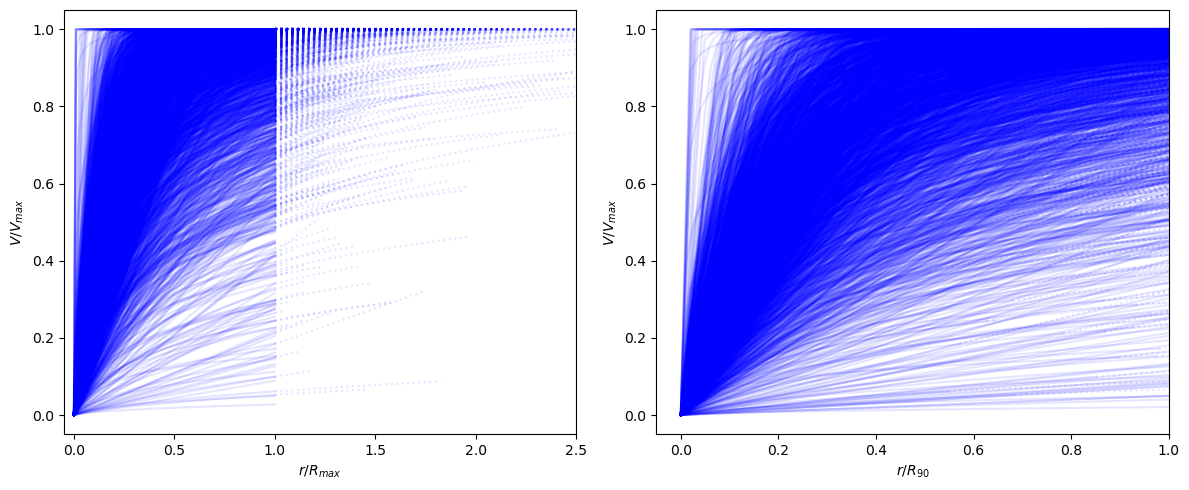

In [23]:
plt.figure(figsize=(12,5), tight_layout=True)


plt.subplot(121)

for i in range(len(BC)):
    alpha = BC['alpha_map'][i]
    Rturn = BC['Rturn_map'][i]
    Rmax = BC['Rmax'][i]
    R90 = BC['R90_kpc'][i]
    
    Vr_max = radii_max*Rmax/(Rturn**alpha + (radii_max*Rmax)**alpha)**(1/alpha)
    
    plt.plot(radii_max, Vr_max, 'b', alpha=0.1)
    
    if R90 > Rmax:
        radii_90 = np.linspace(1,R90/Rmax,50)
        Vr_90 = radii_90*Rmax/(Rturn**alpha + (radii_90*Rmax)**alpha)**(1/alpha)
        plt.plot(radii_90, Vr_90, 'b:', alpha=0.1)

plt.xlim([-0.05, 2.5])

plt.xlabel('$r/R_{max}$')
plt.ylabel('$V/V_{max}$')



plt.subplot(122)

for i in range(len(BC)):
    alpha = BC['alpha_map'][i]
    Rturn = BC['Rturn_map'][i]
    Rmax = BC['Rmax'][i]
    R90 = BC['R90_kpc'][i]
    
    r_Rmax = np.linspace(0,Rmax/R90,50)
    
    Vr_max = r_Rmax*R90/(Rturn**alpha + (r_Rmax*R90)**alpha)**(1/alpha)
    
    plt.plot(r_Rmax, Vr_max, 'b', alpha=0.1)
    
    if R90 > Rmax:
        r_R90 = np.linspace(Rmax/R90,1,50)
        Vr_90 = r_R90*R90/(Rturn**alpha + (r_R90*R90)**alpha)**(1/alpha)
        plt.plot(r_R90, Vr_90, 'b:', alpha=0.1)


plt.xlim([-0.05, 1])

plt.xlabel('$r/R_{90}$')
plt.ylabel('$V/V_{max}$')

plt.tight_layout();

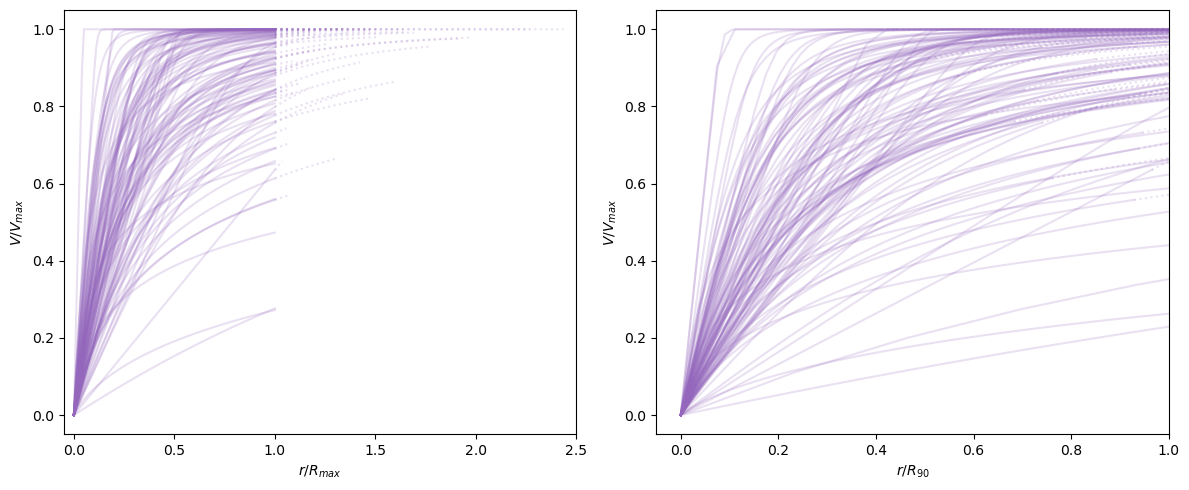

In [25]:
plt.figure(figsize=(12,5), tight_layout=True)


plt.subplot(121)

for i in range(len(goodH2_galaxies)):
    alpha = BC['alpha_map'][i]
    Rturn = BC['Rturn_map'][i]
    Rmax = BC['Rmax'][i]
    R90 = BC['R90_kpc'][i]
    
    Vr_max = radii_max*Rmax/(Rturn**alpha + (radii_max*Rmax)**alpha)**(1/alpha)
    
    plt.plot(radii_max, Vr_max, 'tab:purple', alpha=0.2)
    
    if R90 > Rmax:
        radii_90 = np.linspace(1,R90/Rmax,50)
        Vr_90 = radii_90*Rmax/(Rturn**alpha + (radii_90*Rmax)**alpha)**(1/alpha)
        plt.plot(radii_90, Vr_90, ':', c='tab:purple', alpha=0.2)

plt.xlim([-0.05, 2.5])

plt.xlabel('$r/R_{max}$')
plt.ylabel('$V/V_{max}$')



plt.subplot(122)

for i in range(len(goodH2_galaxies)):
    alpha = BC['alpha_map'][i]
    Rturn = BC['Rturn_map'][i]
    Rmax = BC['Rmax'][i]
    R90 = BC['R90_kpc'][i]
    
    r_Rmax = np.linspace(0,Rmax/R90,50)
    
    Vr_max = r_Rmax*R90/(Rturn**alpha + (r_Rmax*R90)**alpha)**(1/alpha)
    
    plt.plot(r_Rmax, Vr_max, 'tab:purple', alpha=0.2)
    
    if R90 > Rmax:
        r_R90 = np.linspace(Rmax/R90,1,50)
        Vr_90 = r_R90*R90/(Rturn**alpha + (r_R90*R90)**alpha)**(1/alpha)
        plt.plot(r_R90, Vr_90, ':', c='tab:purple', alpha=0.2)


plt.xlim([-0.05, 1])

plt.xlabel('$r/R_{90}$')
plt.ylabel('$V/V_{max}$')

plt.tight_layout();

# Relationship between $M_r$ and $\log(M_{H_2}/M_\odot)$

In [26]:
def bin_median(data, bin_quantity, bins, median_quantity):
    '''
    Calculate the median value of the quantity median_quantity when the objects in 
    data are binned by bin_quanitity.
    
    
    PARAMETERS
    ==========
    
    data : astropy table
        Galaxy data
        
    bin_quantity : string
        Name of column in data by which to bin the data
        
    bins : ndarray of shape (n,)
        Array of bin edges
        
    median_quantity : string
        Name of column in data for which to calculate the median once the data is 
        binned
        
        
    RETURNS
    =======
    
    binned_data : ndarray of shape (n,)
        Median values of median_quantity for each bin of bin_quantity
        
    binned_err : ndarray of shape (n,)
        Statistical uncertainty in each bin (1/sqrt(N), where N is the number of 
        objects in the bin)
    '''
    
    if bin_quantity in ['Mstar', 'NSA_Mstar', 'Mstar_NSA']:
        bin_indices = np.digitize(np.log10(data[bin_quantity]), bins)
    else:
        bin_indices = np.digitize(data[bin_quantity], bins)
    
    n_bins = len(bins)
    
    binned_median = np.zeros(n_bins)
    binned_err = np.zeros(n_bins)
    
    for i in range(n_bins):
        # Find galaxies in this bin
        gal_in_bin = bin_indices == i
        
        # Calculate median of galaxies in bin
        if median_quantity in ['Mstar', 'NSA_Mstar', 'Mtot', 'Mstar_NSA']:
            binned_median[i] = np.log10(np.nanmedian(data[median_quantity][gal_in_bin]))
        elif median_quantity in ['M90_map', 'logHI']:
            binned_median[i] = np.log10(np.nanmedian(10**data[median_quantity][gal_in_bin]))
        else:
            binned_median[i] = np.nanmedian(data[median_quantity][gal_in_bin])
        
        # Calculate statistical uncertainty in bin
        binned_err[i] = 1/np.sqrt(sum(gal_in_bin))
        
    return binned_median, binned_err

In [24]:
Mr_bin_width = 0.5
Mr_bins = np.arange(-23, -16, Mr_bin_width)

BC_M90_medians, BC_M90_errs = bin_median(BC, 'M90_disk_map', Mdisk_bins, 'M90_map')
GV_M90_medians, GV_M90_errs = bin_median(GV, 'M90_disk_map', Mdisk_bins, 'M90_map')
RS_M90_medians, RS_M90_errs = bin_median(RS, 'M90_disk_map', Mdisk_bins, 'M90_map')

<IPython.core.display.Javascript object>


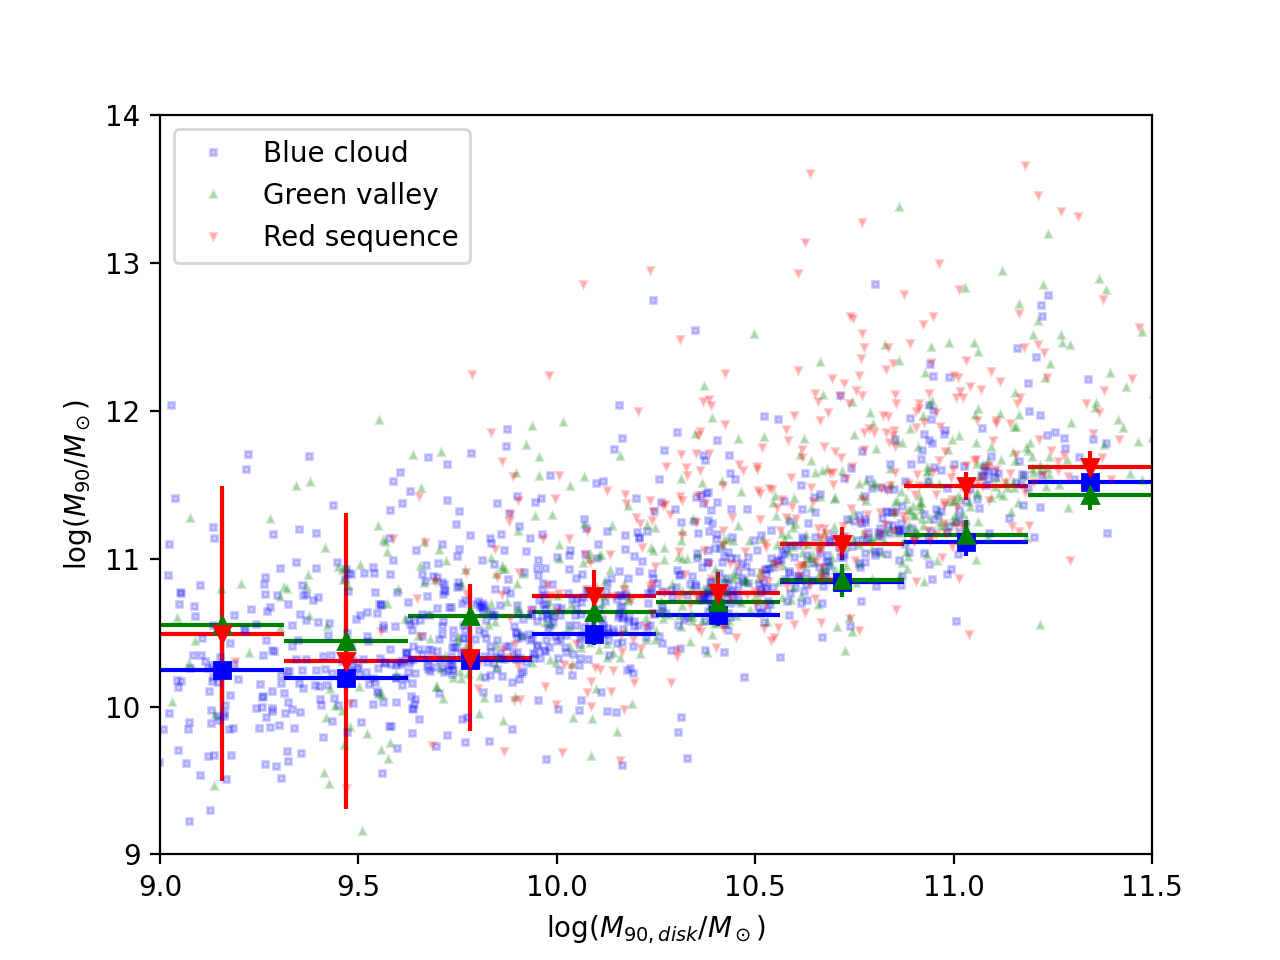

In [25]:
plt.figure()

################################################################################
# Stellar mass from stellar density map
#-------------------------------------------------------------------------------
plt.plot(BC['M90_disk_map'], BC['M90_map'], 'bs', markersize=2, alpha=0.2, label='Blue cloud')
plt.plot(GV['M90_disk_map'], GV['M90_map'], 'g^', markersize=2, alpha=0.2, label='Green valley')
plt.plot(RS['M90_disk_map'], RS['M90_map'], 'rv', markersize=2, alpha=0.2, label='Red sequence')

plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, BC_M90_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=BC_M90_errs, 
             c='b', fmt='s')
plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, GV_M90_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=GV_M90_errs, 
             c='g', fmt='^')
plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, RS_M90_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=RS_M90_errs, 
             c='r', fmt='v')

plt.xlabel('log($M_{90, disk}/M_\odot$)')
plt.ylabel('log($M_{90}/M_\odot$)')

plt.xlim([9,11.5])
plt.ylim([9,14])

plt.legend();
################################################################################

# Relationship between $M_*$ and $M_{HI}$

In [50]:
BC_HI_medians, BC_HI_errs = bin_median(BC_HI, 'M90_disk_map', Mdisk_bins, 'logHI')
GV_HI_medians, GV_HI_errs = bin_median(GV_HI, 'M90_disk_map', Mdisk_bins, 'logHI')
RS_HI_medians, RS_HI_errs = bin_median(RS_HI, 'M90_disk_map', Mdisk_bins, 'logHI')

/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/var/folders/5x/2533z9ns34n_8ghxd5f6hl0c0000gn/T/ipykernel_7901/1303199474.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  binned_err[i] = 1/np.sqrt(sum(gal_in_bin))


<IPython.core.display.Javascript object>


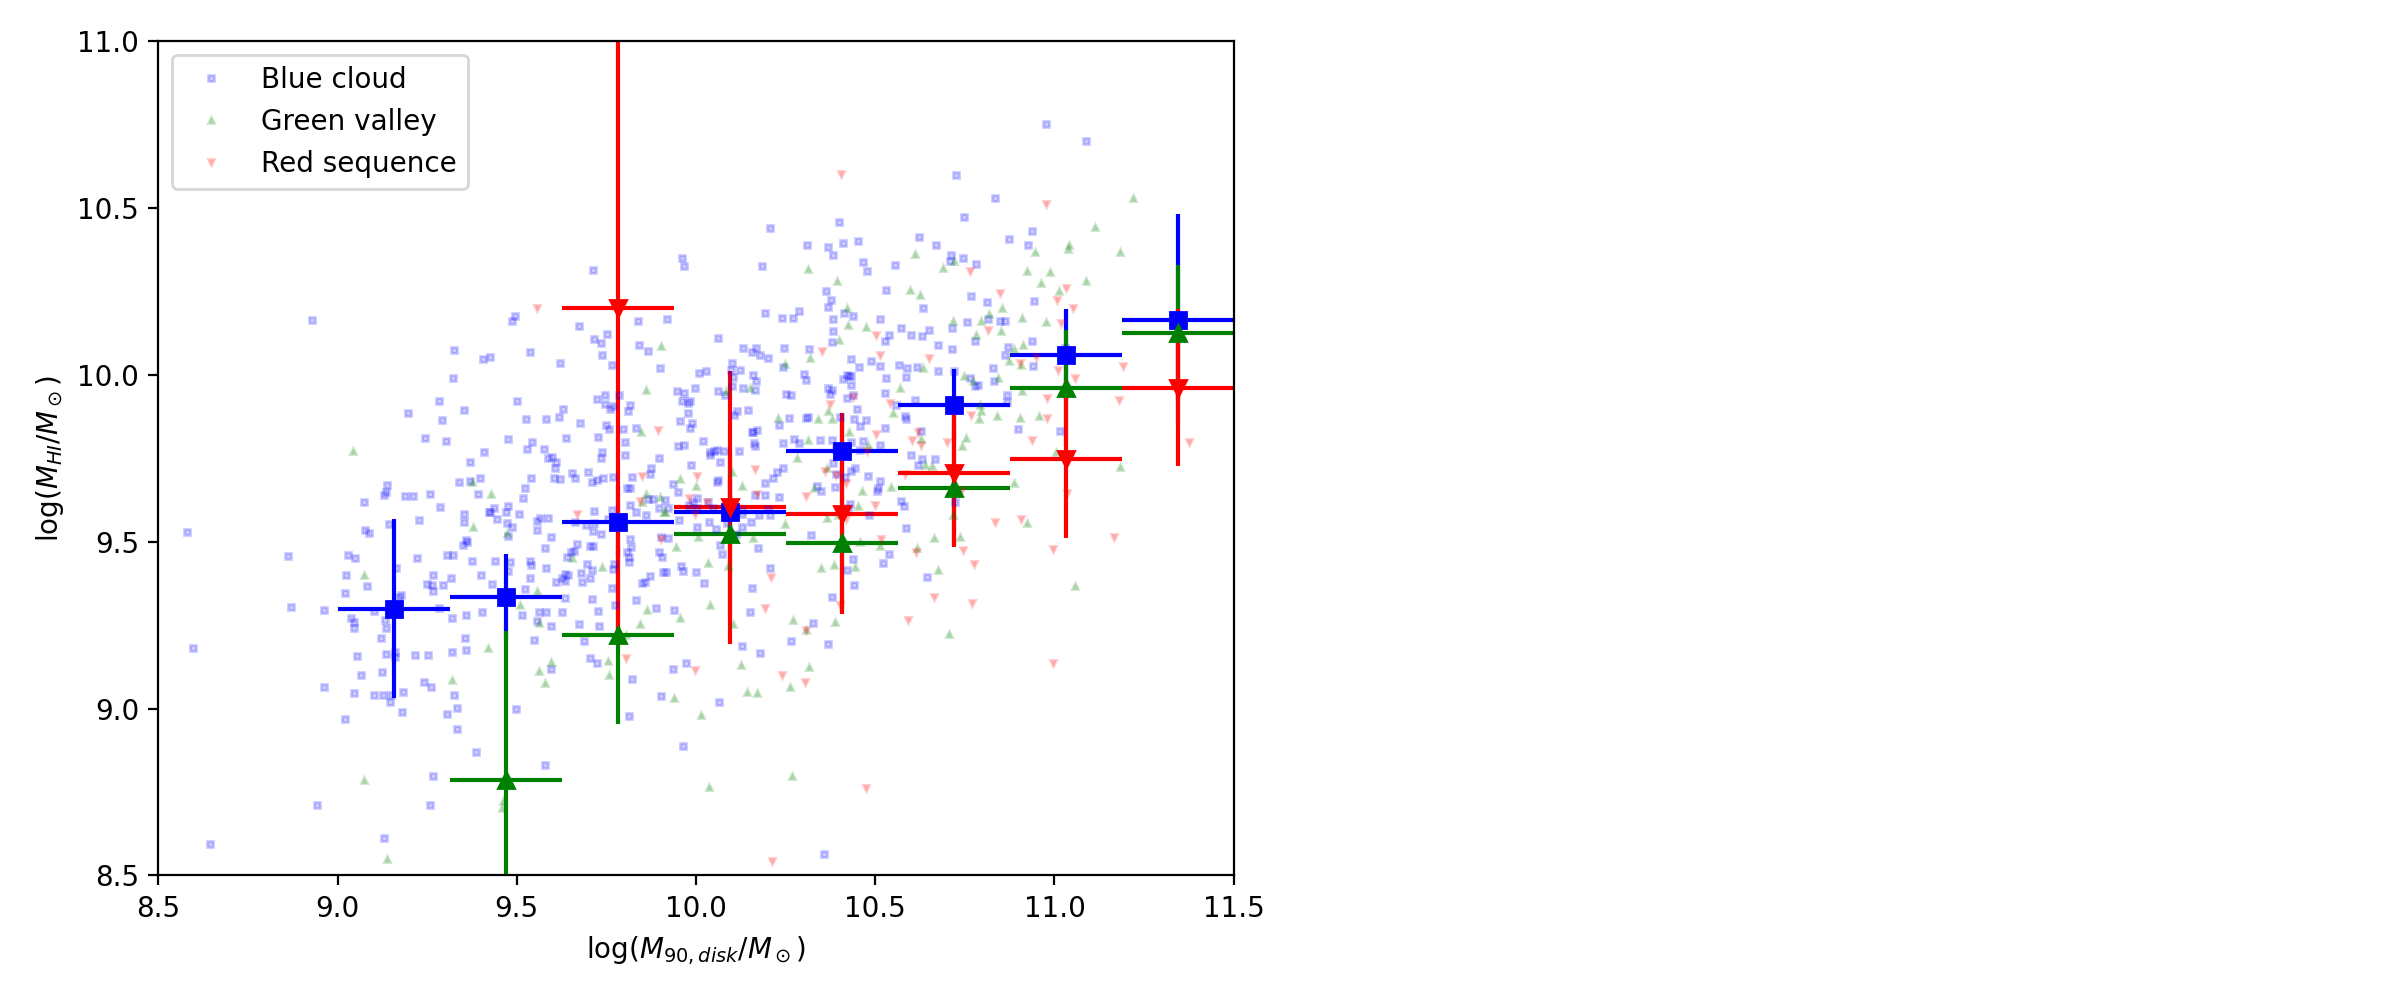

In [28]:
plt.figure(figsize=(12,5))

################################################################################
# Stellar mass from stellar density map
#-------------------------------------------------------------------------------
plt.subplot(121)
plt.plot(BC_HI['M90_disk_map'], BC_HI['logHI'], 'bs', markersize=2, 
         alpha=0.2, label='Blue cloud')
plt.plot(GV_HI['M90_disk_map'], GV_HI['logHI'], 'g^', markersize=2, 
         alpha=0.2, label='Green valley')
plt.plot(RS_HI['M90_disk_map'], RS_HI['logHI'], 'rv', markersize=2, 
         alpha=0.2, label='Red sequence')

plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, BC_HI_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=BC_HI_errs, 
             c='b', fmt='s')
plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, GV_HI_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=GV_HI_errs, 
             c='g', fmt='^')
plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, RS_HI_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=RS_HI_errs, 
             c='r', fmt='v')

plt.xlabel('log($M_{90, disk}/M_\odot$)')
plt.ylabel('log($M_{HI}/M_\odot$)')

plt.xlim([8.5,11.5])
plt.ylim([8.5,11])

plt.legend()
################################################################################

'''
################################################################################
# SDSS DR7
#-------------------------------------------------------------------------------
plt.subplot(122)

plt.plot(np.log10(kias_BC['Mstar_NSA']), kias_BC['HImass'], 's', 
         color='CornflowerBlue', markersize=2, alpha=0.2)
plt.plot(np.log10(kias_GV['Mstar_NSA']), kias_GV['HImass'], 'g^', markersize=2, 
         alpha=0.2)
plt.plot(np.log10(kias_RS['Mstar_NSA']), kias_RS['HImass'], 'rv', markersize=2, 
         alpha=0.2)
         
plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, kias_BC_NSA_HI_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=kias_BC_NSA_HI_errs, 
             c='b', fmt='s', label='Blue cloud')
plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, kias_GV_NSA_HI_medians, 
             
             xerr=0.5*Mdisk_bin_width, yerr=kias_GV_NSA_HI_errs, 
             c='g', fmt='^', label='Green valley')
plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, kias_RS_NSA_HI_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=kias_RS_NSA_HI_errs, 
             c='r', fmt='v', label='Red sequence')

plt.xlabel('log($M_*/M_\odot$) (NSA)')
plt.ylabel('log($M_{HI}/M_\odot$)')

plt.xlim([8,11.5])
plt.ylim([8,11])

plt.legend()
################################################################################
''';
plt.tight_layout();

# Relationship between $M_{vis}$ and $M_{90}$

In [29]:
BC_Mvis_medians, BC_Mvis_errs = bin_median(BC_HI, 'M90_vis', Mdisk_bins, 'M90_map')
GV_Mvis_medians, GV_Mvis_errs = bin_median(GV_HI, 'M90_vis', Mdisk_bins, 'M90_map')
RS_Mvis_medians, RS_Mvis_errs = bin_median(RS_HI, 'M90_vis', Mdisk_bins, 'M90_map')

/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/var/folders/5x/2533z9ns34n_8ghxd5f6hl0c0000gn/T/ipykernel_7901/1303199474.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  binned_err[i] = 1/np.sqrt(sum(gal_in_bin))


<IPython.core.display.Javascript object>


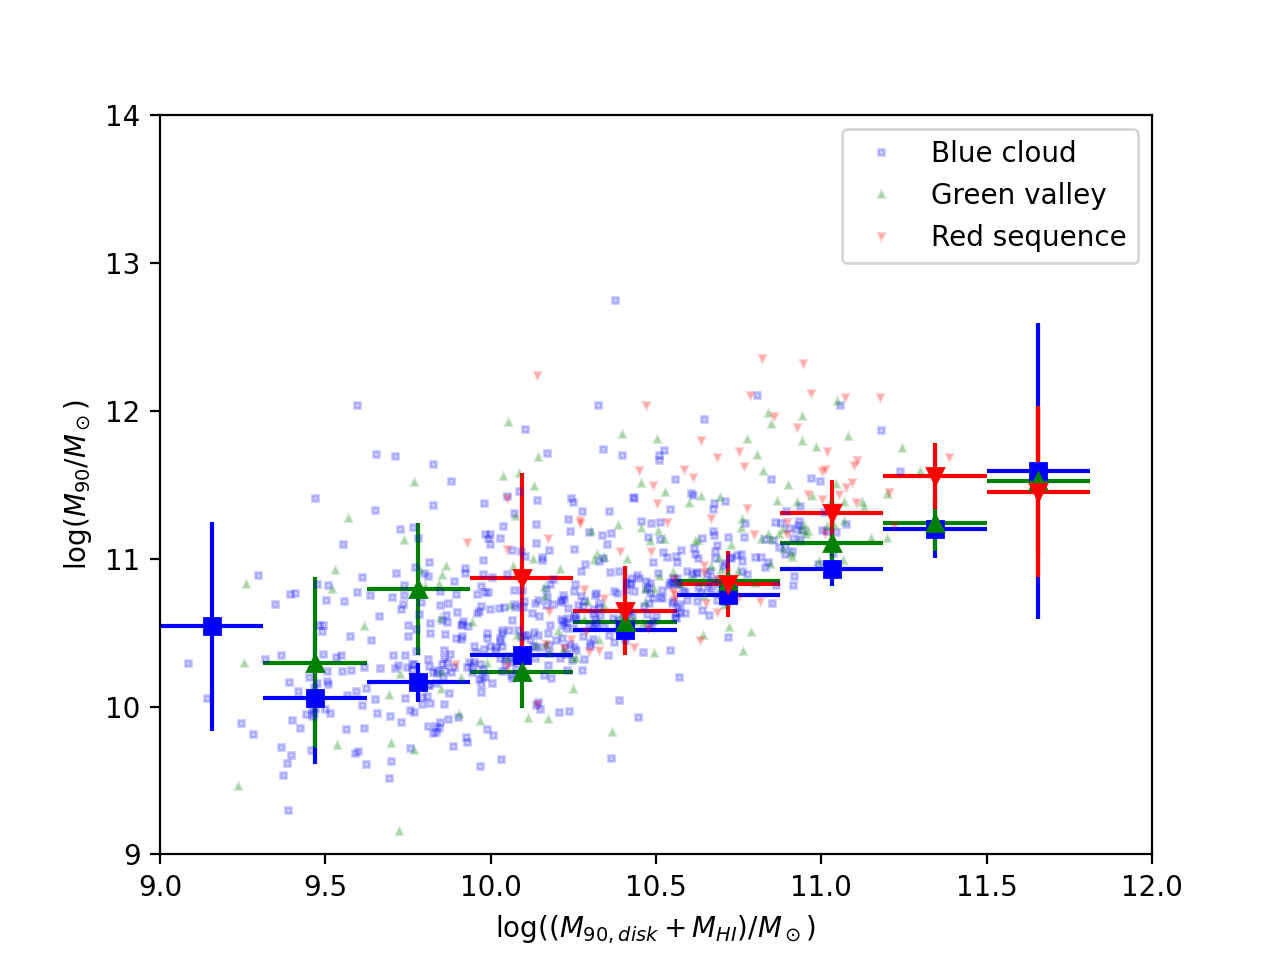

In [30]:
plt.figure()

plt.plot(BC_HI['M90_vis'], BC_HI['M90_map'], 
         'bs', markersize=2, alpha=0.2, label='Blue cloud')
plt.plot(GV_HI['M90_vis'], GV_HI['M90_map'], 
         'g^', markersize=2, alpha=0.2, label='Green valley')
plt.plot(RS_HI['M90_vis'], RS_HI['M90_map'], 
         'rv', markersize=2, alpha=0.2, label='Red sequence')

plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, BC_Mvis_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=BC_Mvis_errs, 
             c='b', fmt='s')
plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, GV_Mvis_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=GV_Mvis_errs, 
             c='g', fmt='^')
plt.errorbar(Mdisk_bins + 0.5*Mdisk_bin_width, RS_Mvis_medians, 
             xerr=0.5*Mdisk_bin_width, yerr=RS_Mvis_errs, 
             c='r', fmt='v')

plt.xlabel('log(($M_{90, disk} + M_{HI})/M_\odot$)')
plt.ylabel('log($M_{90}/M_\odot$)')

plt.xlim([9,12])
plt.ylim([9,14])

plt.legend();

# Distribution in mass ratios

In [31]:
def hist_norm(data, bins):
    '''
    Return the values to plot a normalized histogram.
    
    
    PARAMETERS
    ==========
    
    data : column of astropy table
        Data to be binned
        
    bins : ndarray of shape (n,)
        Bin edges
        
        
    RETURNS
    =======
    
    binned_data : ndarray of shape (n,)
        Number of objects in each bin, normalized by the total number of 
        objects in the sample
        
    binned_data_err : ndarray of shape (n,)
        Statistical uncertainty in the count in each bin.
    '''
    
    # Bin data
    counts,_ = np.histogram(data, bins=bins)
    
    # Normalize binned data
    binned_data = counts/len(data)
    
    # Calculate uncertainty in each bin
    binned_data_err = np.sqrt(counts)/len(data)
    
    return binned_data, binned_data_err

In [32]:
mass_bins = np.linspace(0,25,101)
mass_bin_width = mass_bins[1] - mass_bins[0]

BC_M90Mdisk_binned, BC_M90Mdisk_err = hist_norm(BC['M90_Mdisk_ratio'], bins=mass_bins)
GV_M90Mdisk_binned, GV_M90Mdisk_err = hist_norm(GV['M90_Mdisk_ratio'], bins=mass_bins)
RS_M90Mdisk_binned, RS_M90Mdisk_err = hist_norm(RS['M90_Mdisk_ratio'], bins=mass_bins)

### $M_{90}/M_{90, \text{disk}}$

<IPython.core.display.Javascript object>


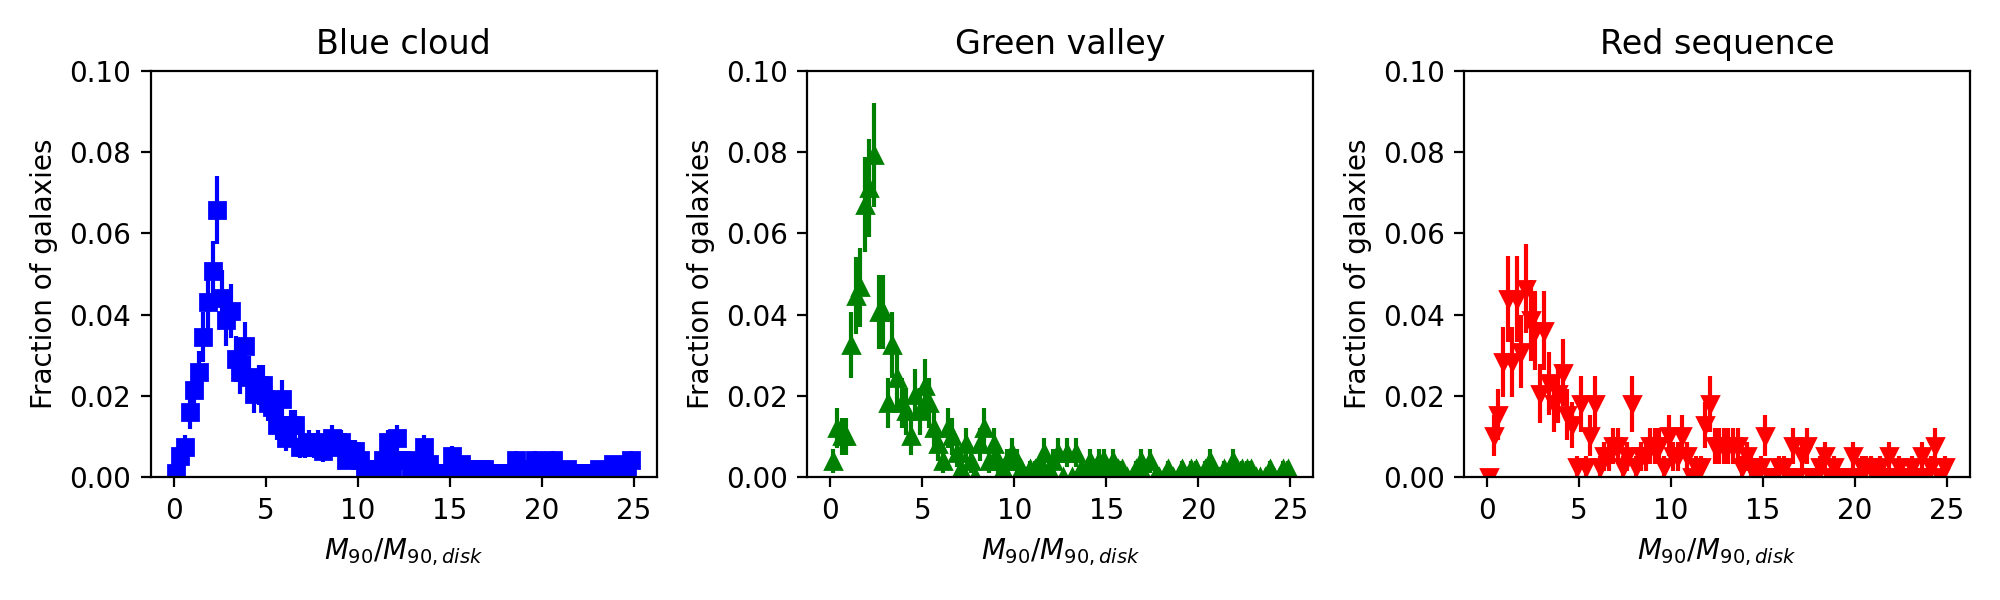

In [33]:
plt.figure(figsize=(10,3))

y_max = 0.1

################################################################################
# Blue cloud
#-------------------------------------------------------------------------------
plt.subplot(131)

plt.errorbar(mass_bins[:-1] + 0.5*mass_bin_width, BC_M90Mdisk_binned, 
             xerr=0.5*mass_bin_width, yerr=BC_M90Mdisk_err, fmt='bs')

plt.ylim(0,y_max)

plt.xlabel('$M_{90}/M_{90, disk}$')
plt.ylabel('Fraction of galaxies')

plt.title('Blue cloud')
################################################################################


################################################################################
# Green valley
#-------------------------------------------------------------------------------
plt.subplot(132)

plt.errorbar(mass_bins[:-1] + 0.5*mass_bin_width, GV_M90Mdisk_binned, 
             xerr=0.5*mass_bin_width, yerr=GV_M90Mdisk_err, fmt='g^')

plt.ylim(0,y_max)

plt.xlabel('$M_{90}/M_{90, disk}$')
plt.ylabel('Fraction of galaxies')

plt.title('Green valley')
################################################################################


################################################################################
# Red sequence
#-------------------------------------------------------------------------------
plt.subplot(133)

plt.errorbar(mass_bins[:-1] + 0.5*mass_bin_width, RS_M90Mdisk_binned, 
             xerr=0.5*mass_bin_width, yerr=RS_M90Mdisk_err, fmt='rv')

plt.ylim(0,y_max)

plt.xlabel('$M_{90}/M_{90, disk}$')
plt.ylabel('Fraction of galaxies')

plt.title('Red sequence')
################################################################################

plt.tight_layout();

### $M_{90}/(M_{90, \text{disk}} + M_\text{HI})$

In [34]:
BC_M90Mvis_binned, BC_M90Mvis_err = hist_norm(BC_HI['M90_MdiskHI_ratio'], bins=mass_bins)
GV_M90Mvis_binned, GV_M90Mvis_err = hist_norm(GV_HI['M90_MdiskHI_ratio'], bins=mass_bins)
RS_M90Mvis_binned, RS_M90Mvis_err = hist_norm(RS_HI['M90_MdiskHI_ratio'], bins=mass_bins)

<IPython.core.display.Javascript object>


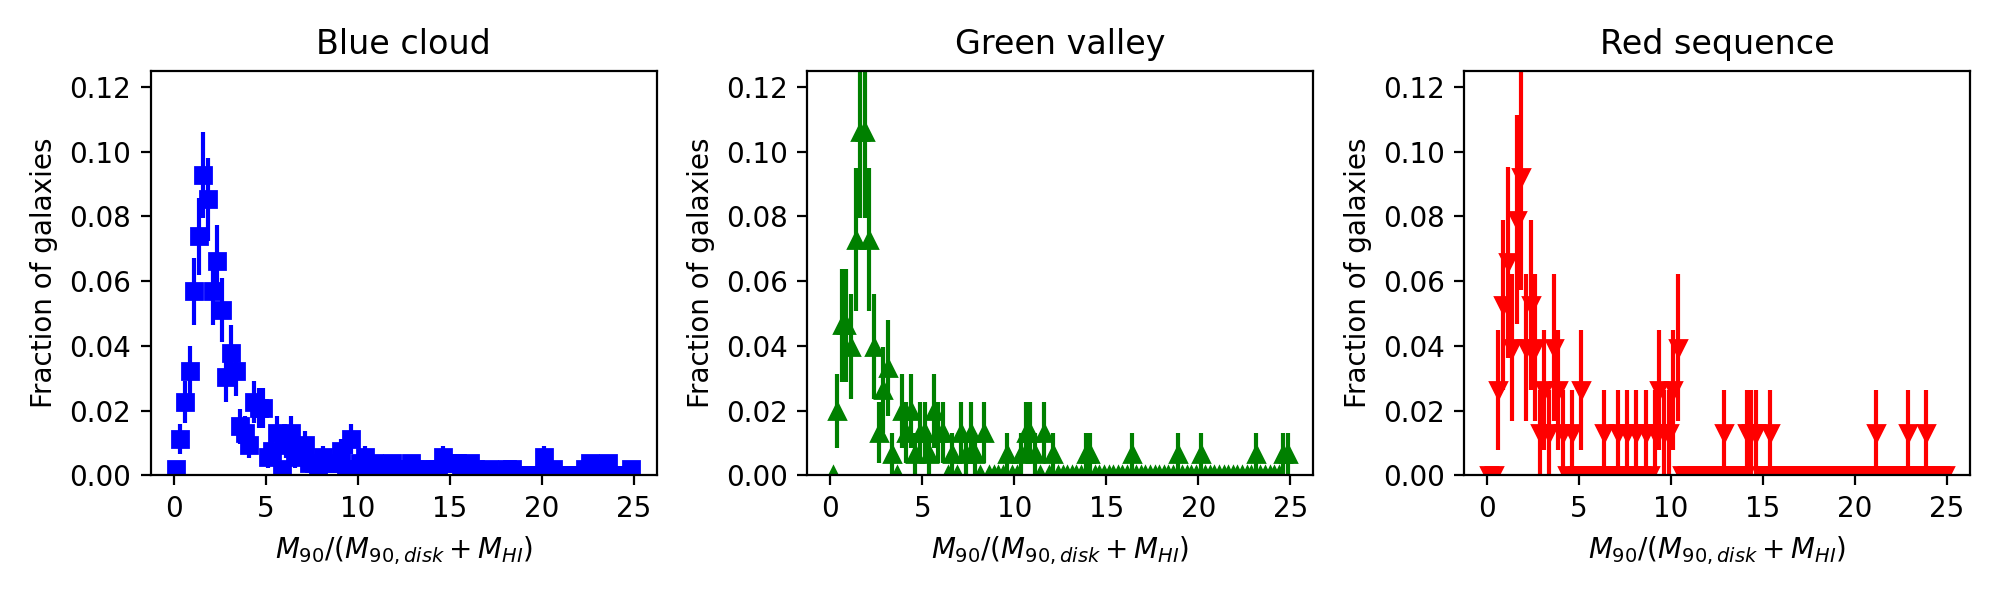

In [35]:
plt.figure(figsize=(10,3))

y_max = 0.125

################################################################################
# Blue cloud
#-------------------------------------------------------------------------------
plt.subplot(131)

plt.errorbar(mass_bins[:-1] + 0.5*mass_bin_width, BC_M90Mvis_binned, 
             xerr=0.5*mass_bin_width, yerr=BC_M90Mvis_err, fmt='bs')

plt.ylim(0,y_max)

plt.xlabel('$M_{90}/(M_{90, disk} + M_{HI})$')
plt.ylabel('Fraction of galaxies')

plt.title('Blue cloud')
################################################################################


################################################################################
# Green valley
#-------------------------------------------------------------------------------
plt.subplot(132)

plt.errorbar(mass_bins[:-1] + 0.5*mass_bin_width, GV_M90Mvis_binned, 
             xerr=0.5*mass_bin_width, yerr=GV_M90Mvis_err, fmt='g^')

plt.ylim(0,y_max)

plt.xlabel('$M_{90}/(M_{90, disk} + M_{HI})$')
plt.ylabel('Fraction of galaxies')

plt.title('Green valley')
################################################################################


################################################################################
# Red sequence
#-------------------------------------------------------------------------------
plt.subplot(133)

plt.errorbar(mass_bins[:-1] + 0.5*mass_bin_width, RS_M90Mvis_binned, 
             xerr=0.5*mass_bin_width, yerr=RS_M90Mvis_err, fmt='rv')

plt.ylim(0,y_max)

plt.xlabel('$M_{90}/(M_{90, disk} + M_{HI})$')
plt.ylabel('Fraction of galaxies')

plt.title('Red sequence')
################################################################################

plt.tight_layout();

# Relationship between $M_r$ and the mass ratios

In [36]:
Mr_bins = np.linspace(-22.5, -17.5, 16)
Mr_bin_width = Mr_bins[1] - Mr_bins[0]

Mdisk_medians, Mdisk_errs = bin_median(good_galaxies, 'rabsmag', Mr_bins, 'M90_Mdisk_ratio')
MdiskHI_medians, MdiskHI_errs = bin_median(goodHI_galaxies, 'rabsmag', Mr_bins, 'M90_MdiskHI_ratio')

/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/var/folders/5x/2533z9ns34n_8ghxd5f6hl0c0000gn/T/ipykernel_7901/1303199474.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  binned_err[i] = 1/np.sqrt(sum(gal_in_bin))


<IPython.core.display.Javascript object>


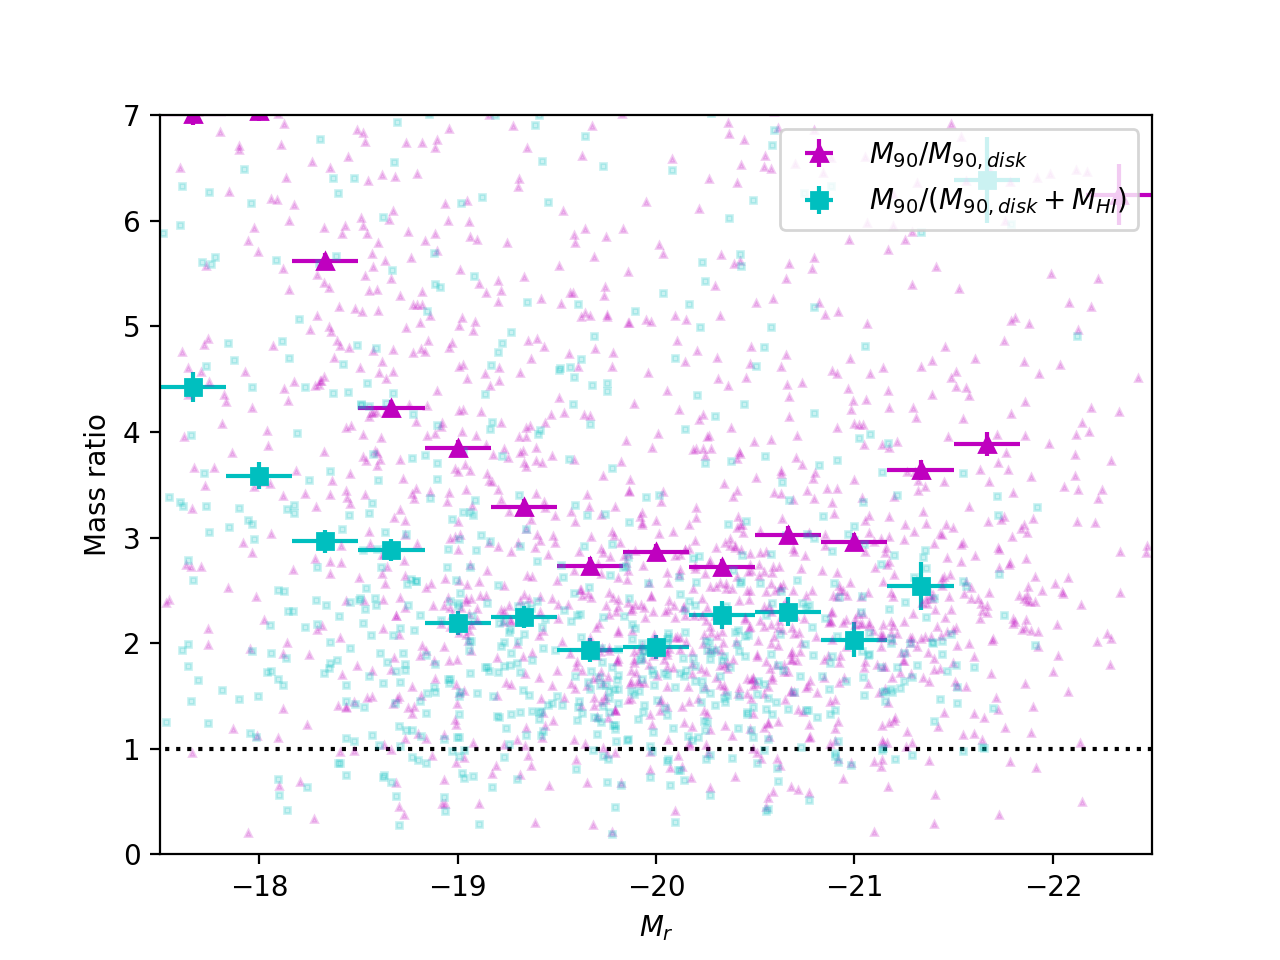

In [37]:
plt.figure()

################################################################################
# Stellar mass from stellar density map
#-------------------------------------------------------------------------------
plt.hlines(1, -22.5, -17.5, colors='k', linestyle=':')

plt.plot(good_galaxies['rabsmag'], good_galaxies['M90_Mdisk_ratio'], 
         'm^', markersize=2, alpha=0.2)
plt.plot(goodHI_galaxies['rabsmag'], goodHI_galaxies['M90_MdiskHI_ratio'], 
         'cs', markersize=2, alpha=0.2)

plt.errorbar(Mr_bins + 0.5*Mr_bin_width, Mdisk_medians, 
             xerr=0.5*Mr_bin_width, yerr=Mdisk_errs, 
             c='m', fmt='^', label='$M_{90}/M_{90, disk}$')
plt.errorbar(Mr_bins + 0.5*Mr_bin_width, MdiskHI_medians, 
             xerr=0.5*Mr_bin_width, yerr=MdiskHI_errs, 
             c='c', fmt='s', label='$M_{90}/(M_{90, disk} + M_{HI})$')

plt.xlabel('$M_r$')
plt.ylabel('Mass ratio')

plt.xlim([-17.5,-22.5])
plt.ylim([0,7])

plt.legend();
################################################################################

# Relationship between metallicity and mass ratios

In [38]:
Z_bins = np.linspace(8.5, 10.5, 13)
Z_bin_width = Z_bins[1] - Z_bins[0]

ZMdisk_medians, ZMdisk_errs = bin_median(good_galaxies, 'Z12logOH', Z_bins, 'M90_Mdisk_ratio')
ZMdiskHI_medians, ZMdiskHI_errs = bin_median(goodHI_galaxies, 'Z12logOH', Z_bins, 'M90_MdiskHI_ratio')

/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/var/folders/5x/2533z9ns34n_8ghxd5f6hl0c0000gn/T/ipykernel_7901/1303199474.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  binned_err[i] = 1/np.sqrt(sum(gal_in_bin))


<IPython.core.display.Javascript object>


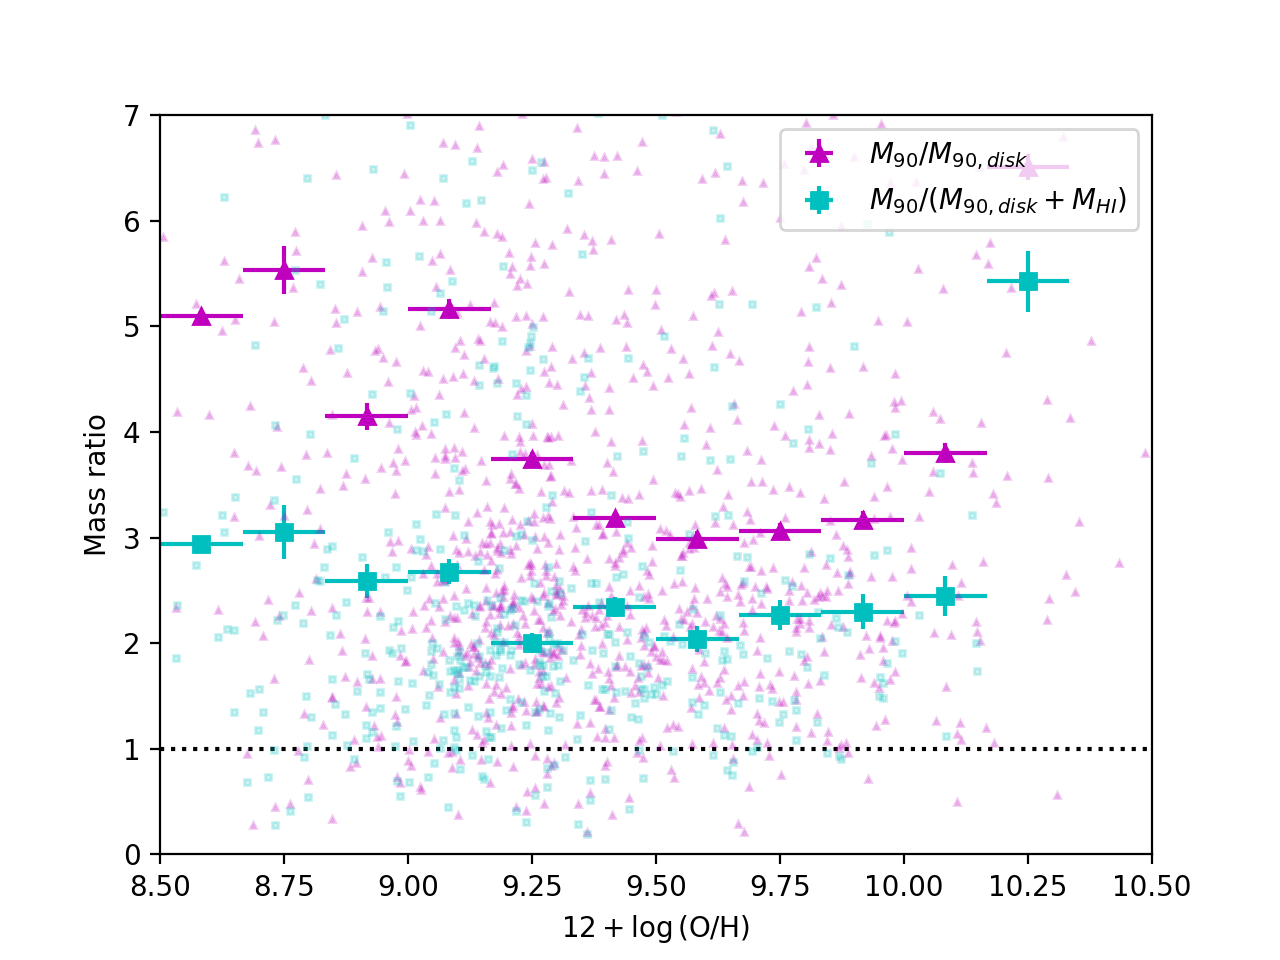

In [39]:
plt.figure()

################################################################################
# Stellar mass from stellar density map
#-------------------------------------------------------------------------------
plt.hlines(1, 8.5, 10.5, colors='k', linestyle=':')

plt.plot(good_galaxies['Z12logOH'], good_galaxies['M90_Mdisk_ratio'], 
         'm^', markersize=2, alpha=0.2)
plt.plot(goodHI_galaxies['Z12logOH'], goodHI_galaxies['M90_MdiskHI_ratio'], 
         'cs', markersize=2, alpha=0.2)

plt.errorbar(Z_bins + 0.5*Z_bin_width, ZMdisk_medians, 
             xerr=0.5*Z_bin_width, yerr=ZMdisk_errs, 
             c='m', fmt='^', label='$M_{90}/M_{90, disk}$')
plt.errorbar(Z_bins + 0.5*Z_bin_width, ZMdiskHI_medians, 
             xerr=0.5*Z_bin_width, yerr=ZMdiskHI_errs, 
             c='c', fmt='s', label='$M_{90}/(M_{90, disk} + M_{HI})$')

plt.xlabel('$12 + \log$(O/H)')
plt.ylabel('Mass ratio')

plt.xlim([8.5,10.5])
plt.ylim([0,7])

plt.legend();
################################################################################

# Relationship between $M_r$, metallicity, and mass ratio

In [40]:
def bin2D_median(data, bin1_quantity, bin2_quantity, bins1, bins2, median_quantity):
    '''
    Calculate the median value of the quantity median_quantity when the objects in 
    data are binned by bin_quanitity1 and bin_quantity2.
    
    
    PARAMETERS
    ==========
    
    data : astropy table
        Galaxy data
        
    bin1_quantity, bin2_quantity : string
        Name of columns in data by which to bin the data
        
    bins1, bins2 : ndarray of shape (n,)
        Arrays of bin edges (arrays do not need to be the same length)
        
    median_quantity : string
        Name of column in data for which to calculate the median once the data is 
        binned
        
        
    RETURNS
    =======
    
    binned_data : ndarray of shape (n,m)
        Median values of median_quantity for each bin of bin1_quantity and bin2_quantity
    '''
    
    if bin1_quantity in ['Mstar', 'NSA_Mstar']:
        bin1_indices = np.digitize(np.log10(data[bin1_quantity]), bins1)
    else:
        bin1_indices = np.digitize(data[bin1_quantity], bins1)
    
    if bin2_quantity in ['Mstar', 'NSA_Mstar']:
        bin2_indices = np.digitize(np.log10(data[bin2_quantity]), bins2)
    else:
        bin2_indices = np.digitize(data[bin2_quantity], bins2)
    
    n1_bins = len(bins1)
    n2_bins = len(bins2)
    
    binned_median = np.nan*np.ones((n1_bins, n2_bins))
    
    for i in range(n1_bins):
        for j in range(n2_bins):
            # Find galaxies in this bin
            gal_in_bin = np.logical_and(bin1_indices == i, bin2_indices == j)

            # Calculate median of galaxies in bin
            if median_quantity in ['Mstar', 'NSA_Mstar', 'Mtot']:
                binned_median[i,j] = np.log10(np.median(data[median_quantity][gal_in_bin]))
            else:
                binned_median[i,j] = np.median(data[median_quantity][gal_in_bin])
        
    return binned_median

In [41]:
Mr_bins2d = np.linspace(-22.5, -17.5, 5)
Z_bins2d = np.linspace(8.5, 10.5, 5)

M90Mdisk_median = bin2D_median(good_galaxies, 
                               'Z12logOH', 'rabsmag', 
                               Z_bins2d, Mr_bins2d, 
                               'M90_Mdisk_ratio')

M90MHI_median = bin2D_median(goodHI_galaxies, 
                             'Z12logOH', 'rabsmag', 
                             Z_bins2d, Mr_bins2d, 
                             'M90_MdiskHI_ratio')

/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3417: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


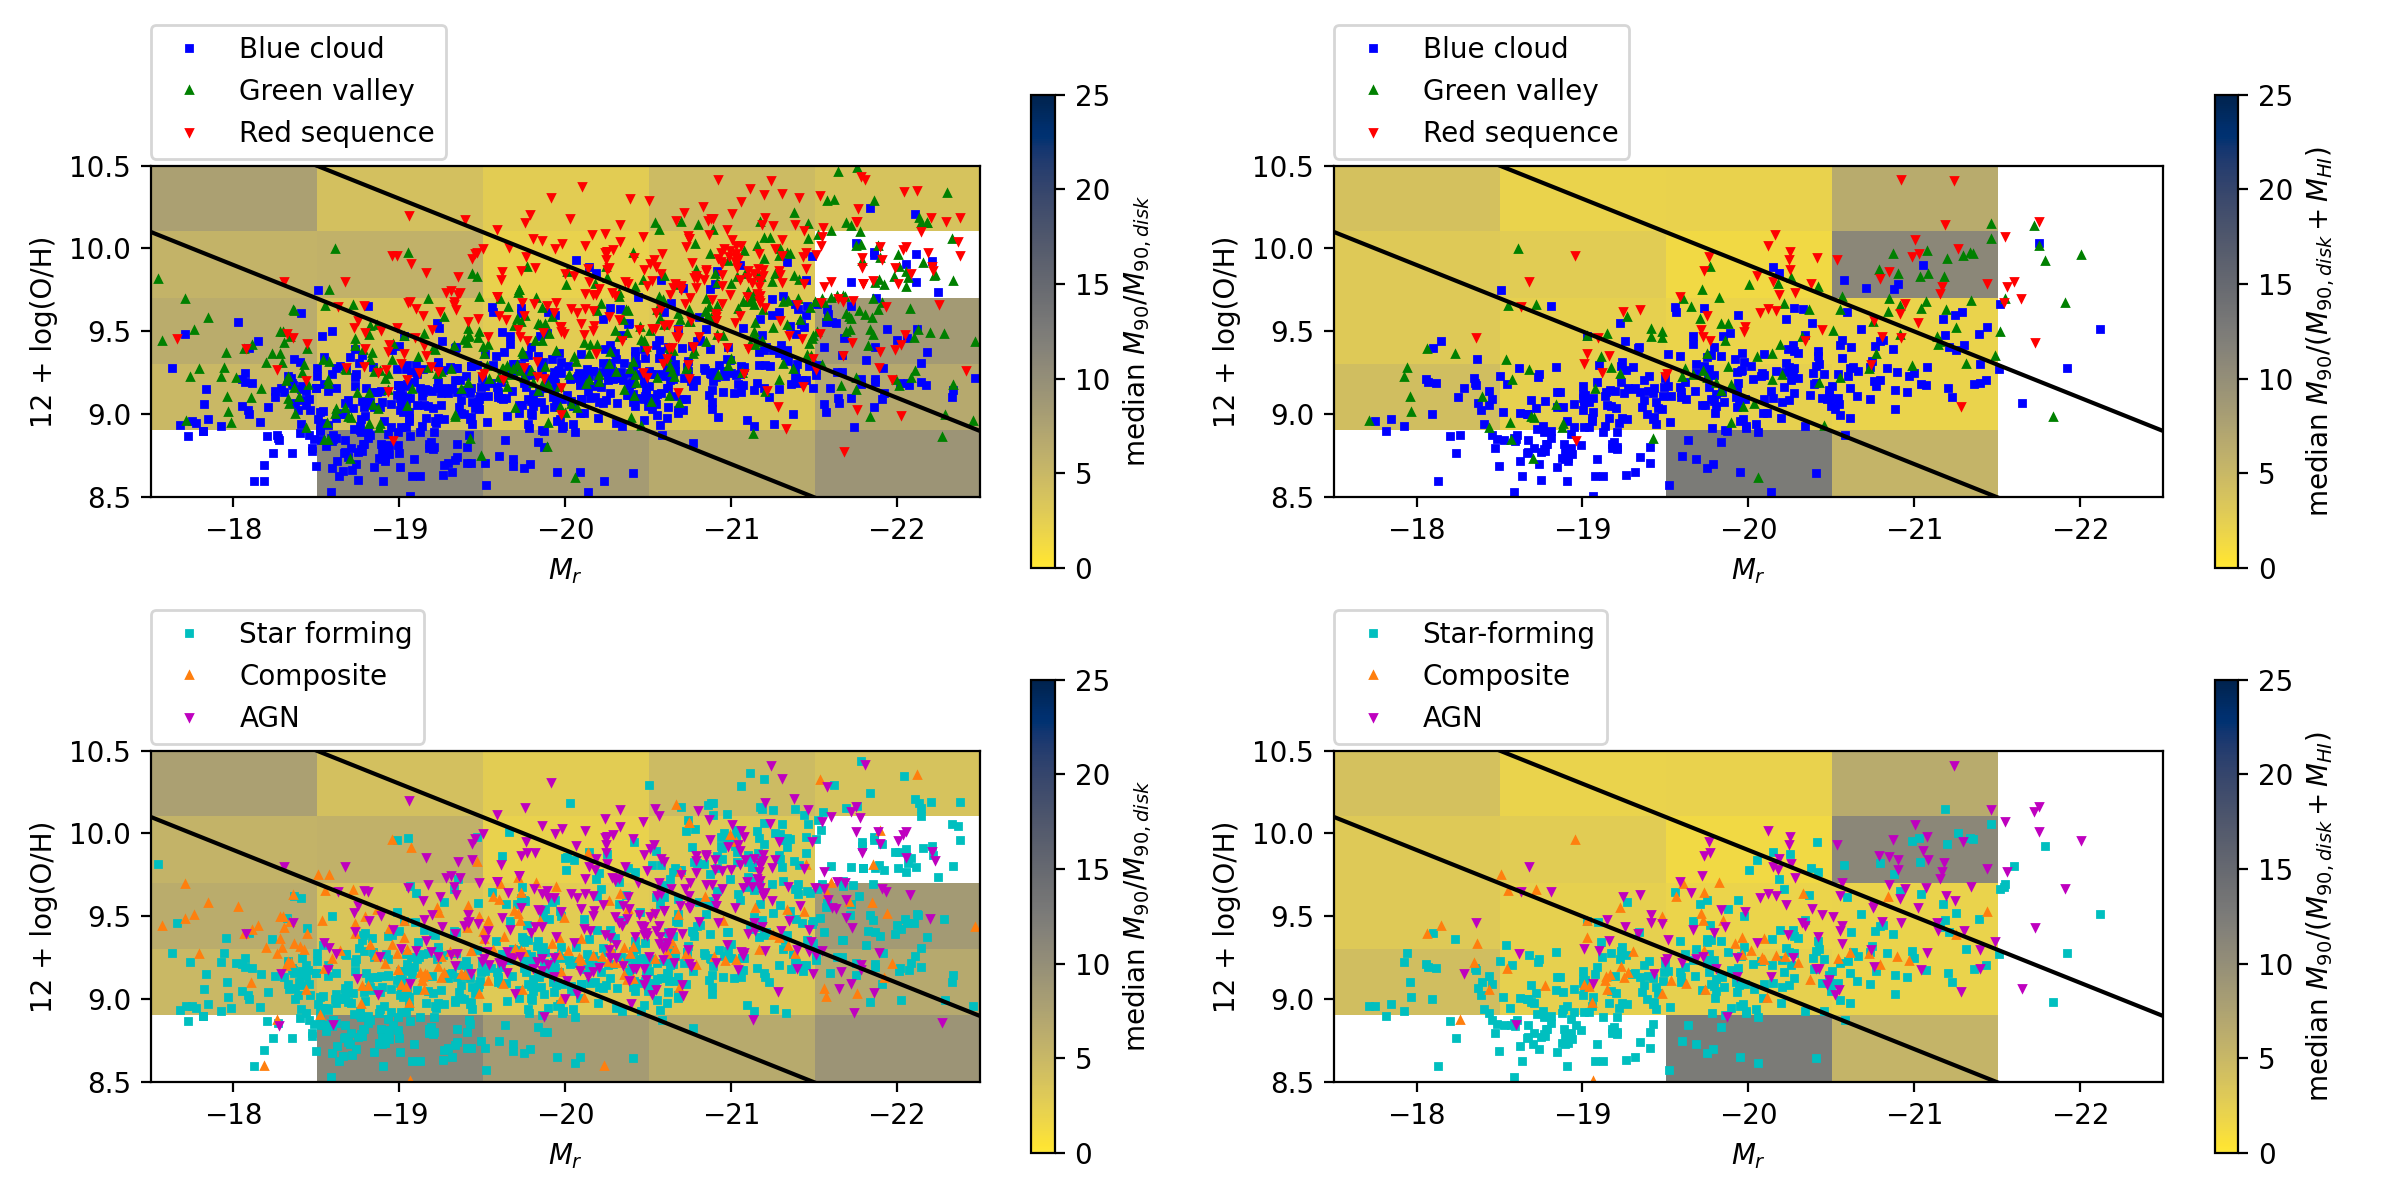

In [42]:
plt.figure(figsize=(12,6))

################################################################################
# Mtot/M*
#-------------------------------------------------------------------------------
plt.subplot(221)

plt.imshow(M90Mdisk_median, cmap='cividis_r', vmin=0, vmax=25, origin='lower', 
           extent=(Mr_bins2d[0], Mr_bins2d[-1], Z_bins2d[-1], Z_bins2d[0]))

plt.plot(BC['rabsmag'], BC['Z12logOH'], 'bs', markersize=2, label='Blue cloud')
plt.plot(GV['rabsmag'], GV['Z12logOH'], 'g^', markersize=2, label='Green valley')
plt.plot(RS['rabsmag'], RS['Z12logOH'], 'rv', markersize=2, label='Red sequence')

Mr = np.linspace(-23,-17,5)
plt.plot(Mr, 0.4*Mr + 17.9, 'k')
plt.plot(Mr, 0.4*Mr + 17.1, 'k')

plt.xlabel('$M_r$')
plt.ylabel('12 + log(O/H)')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/M_{90, disk}$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(Z_bins2d[0], Z_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################


################################################################################
# Mtot/(M* + MHI)
#-------------------------------------------------------------------------------
plt.subplot(222)

plt.imshow(M90MHI_median, cmap='cividis_r', vmin=0, vmax=25, origin='lower', 
           extent=(Mr_bins2d[0], Mr_bins2d[-1], Z_bins2d[-1], Z_bins2d[0]))

plt.plot(BC_HI['rabsmag'], BC_HI['Z12logOH'], 'bs', markersize=2, label='Blue cloud')
plt.plot(GV_HI['rabsmag'], GV_HI['Z12logOH'], 'g^', markersize=2, label='Green valley')
plt.plot(RS_HI['rabsmag'], RS_HI['Z12logOH'], 'rv', markersize=2, label='Red sequence')

plt.plot(Mr, 0.4*Mr + 17.9, 'k')
plt.plot(Mr, 0.4*Mr + 17.1, 'k')

plt.xlabel('$M_r$')
plt.ylabel('12 + log(O/H)')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/(M_{90, disk} + M_{HI})$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(Z_bins2d[0], Z_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################


################################################################################
# Mtot/M* colored by BPT
#-------------------------------------------------------------------------------
plt.subplot(223)

plt.imshow(M90Mdisk_median, cmap='cividis_r', vmin=0, vmax=25, origin='lower', 
           extent=(Mr_bins2d[0], Mr_bins2d[-1], Z_bins2d[-1], Z_bins2d[0]))

plt.plot(SF['rabsmag'], SF['Z12logOH'], 'cs', markersize=2, label='Star forming')
plt.plot(comp['rabsmag'], comp['Z12logOH'], '^', c='tab:orange', markersize=2, label='Composite')
plt.plot(AGN['rabsmag'], AGN['Z12logOH'], 'mv', markersize=2, label='AGN')

Mr = np.linspace(-23,-17,5)
plt.plot(Mr, 0.4*Mr + 17.9, 'k')
plt.plot(Mr, 0.4*Mr + 17.1, 'k')

plt.xlabel('$M_r$')
plt.ylabel('12 + log(O/H)')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/M_{90, disk}$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(Z_bins2d[0], Z_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################


################################################################################
# Mtot/(M* + MHI) colored by BPT
#-------------------------------------------------------------------------------
plt.subplot(224)

plt.imshow(M90MHI_median, cmap='cividis_r', vmin=0, vmax=25, origin='lower', 
           extent=(Mr_bins2d[0], Mr_bins2d[-1], Z_bins2d[-1], Z_bins2d[0]))

plt.plot(SF_HI['rabsmag'], SF_HI['Z12logOH'], 'cs', markersize=2, label='Star-forming')
plt.plot(comp_HI['rabsmag'], comp_HI['Z12logOH'], '^', c='tab:orange', markersize=2, label='Composite')
plt.plot(AGN_HI['rabsmag'], AGN_HI['Z12logOH'], 'mv', markersize=2, label='AGN')

plt.plot(Mr, 0.4*Mr + 17.9, 'k')
plt.plot(Mr, 0.4*Mr + 17.1, 'k')

plt.xlabel('$M_r$')
plt.ylabel('12 + log(O/H)')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/(M_{90, disk} + M_{HI})$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(Z_bins2d[0], Z_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################

plt.tight_layout();

# Relationship between $M_r$, (s)SFR, and mass ratio

In [43]:
Mr_bins2d = np.arange(-22.5, -16.5, 1)
SFR_bins2d = np.arange(-2, 2, 1)
sSFR_bins2d = np.arange(-13, -8, 1)

In [44]:
M90Mdisk_median_SFR = bin2D_median(good_galaxies, 
                                   'SFR', 'rabsmag', 
                                   SFR_bins2d, Mr_bins2d, 
                                   'M90_Mdisk_ratio')

M90MHI_median_SFR = bin2D_median(goodHI_galaxies, 
                                 'SFR', 'rabsmag', 
                                 SFR_bins2d, Mr_bins2d, 
                                 'M90_MdiskHI_ratio')

M90Mdisk_median_sSFR = bin2D_median(good_galaxies, 
                                   'sSFR', 'rabsmag', 
                                   sSFR_bins2d, Mr_bins2d, 
                                   'M90_Mdisk_ratio')

M90MHI_median_sSFR = bin2D_median(goodHI_galaxies, 
                                 'sSFR', 'rabsmag', 
                                 sSFR_bins2d, Mr_bins2d, 
                                 'M90_MdiskHI_ratio')

/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3417: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/kellydouglass/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [45]:
# SFR
M90Mdisk_median_SFR_SF = bin2D_median(SF, 
                                      'SFR', 'rabsmag', 
                                      SFR_bins2d, Mr_bins2d, 
                                      'M90_Mdisk_ratio')

M90MHI_median_SFR_SF = bin2D_median(SF_HI, 
                                    'SFR', 'rabsmag', 
                                    SFR_bins2d, Mr_bins2d, 
                                    'M90_MdiskHI_ratio')

M90Mdisk_median_SFR_comp = bin2D_median(comp, 
                                        'SFR', 'rabsmag', 
                                        SFR_bins2d, Mr_bins2d, 
                                        'M90_Mdisk_ratio')

M90MHI_median_SFR_comp = bin2D_median(comp_HI, 
                                      'SFR', 'rabsmag', 
                                      SFR_bins2d, Mr_bins2d, 
                                      'M90_MdiskHI_ratio')

M90Mdisk_median_SFR_AGN = bin2D_median(AGN, 
                                       'SFR', 'rabsmag', 
                                       SFR_bins2d, Mr_bins2d, 
                                       'M90_Mdisk_ratio')

M90MHI_median_SFR_AGN = bin2D_median(AGN_HI, 
                                     'SFR', 'rabsmag', 
                                     SFR_bins2d, Mr_bins2d, 
                                     'M90_MdiskHI_ratio')

# sSFR
M90Mdisk_median_sSFR_SF = bin2D_median(SF, 
                                       'sSFR', 'rabsmag', 
                                       sSFR_bins2d, Mr_bins2d, 
                                       'M90_Mdisk_ratio')

M90MHI_median_sSFR_SF = bin2D_median(SF_HI, 
                                     'sSFR', 'rabsmag', 
                                     sSFR_bins2d, Mr_bins2d, 
                                     'M90_MdiskHI_ratio')

M90Mdisk_median_sSFR_comp = bin2D_median(comp, 
                                         'sSFR', 'rabsmag', 
                                         sSFR_bins2d, Mr_bins2d, 
                                         'M90_Mdisk_ratio')

M90MHI_median_sSFR_comp = bin2D_median(comp_HI, 
                                       'sSFR', 'rabsmag', 
                                       sSFR_bins2d, Mr_bins2d, 
                                       'M90_MdiskHI_ratio')

M90Mdisk_median_sSFR_AGN = bin2D_median(AGN, 
                                        'sSFR', 'rabsmag', 
                                        sSFR_bins2d, Mr_bins2d, 
                                        'M90_Mdisk_ratio')

M90MHI_median_sSFR_AGN = bin2D_median(AGN_HI, 
                                      'sSFR', 'rabsmag', 
                                      sSFR_bins2d, Mr_bins2d, 
                                      'M90_MdiskHI_ratio')

<IPython.core.display.Javascript object>


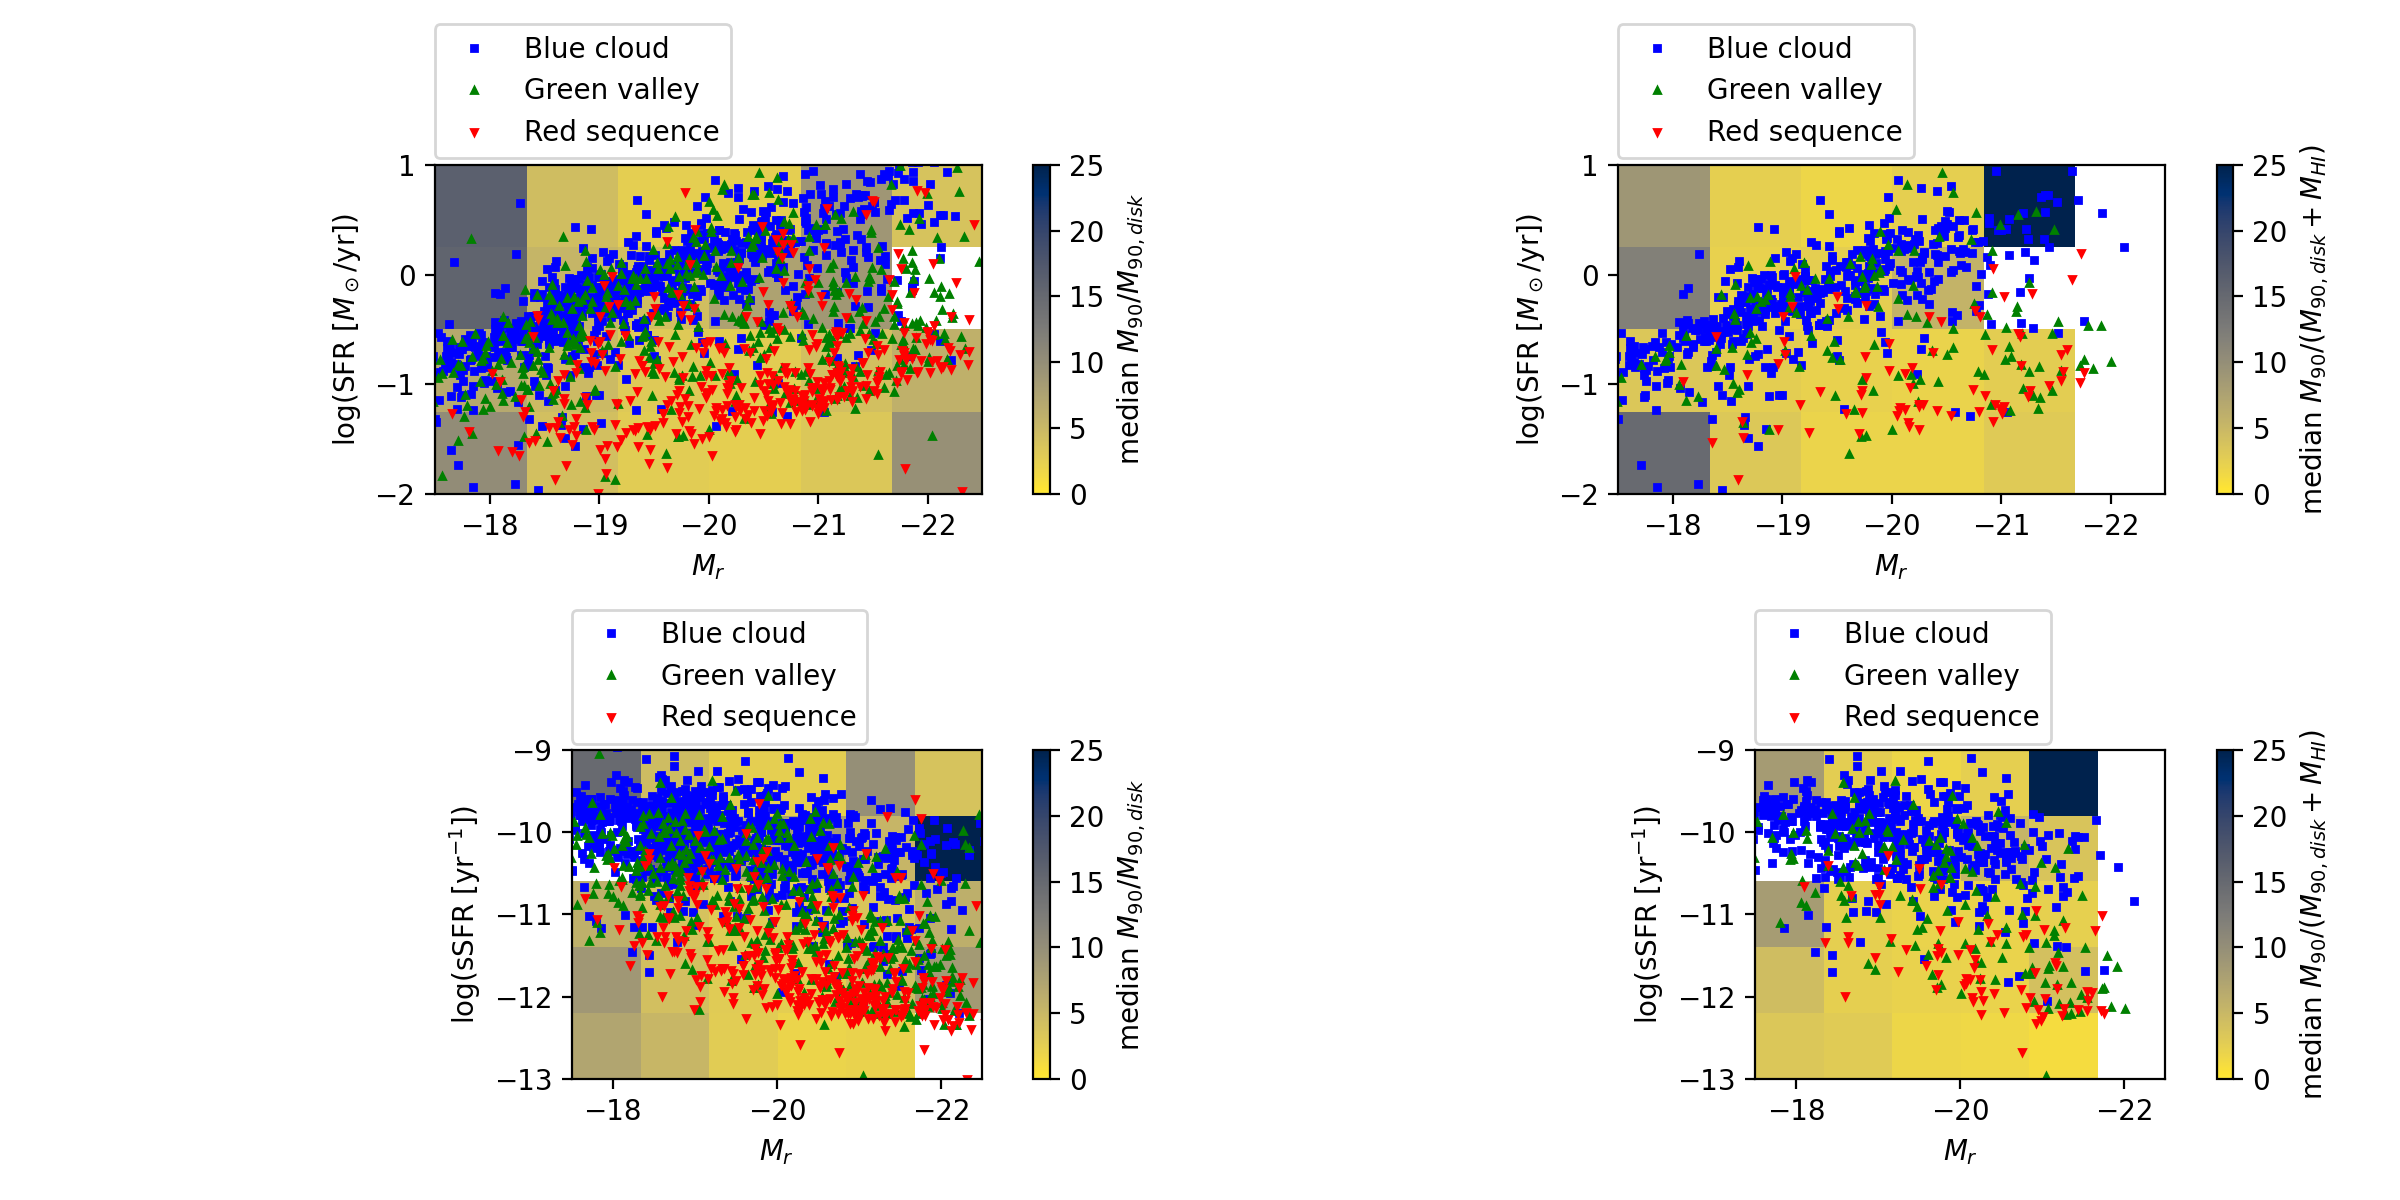

In [46]:
plt.figure(figsize=(12,6))

################################################################################
# Mtot/M*
#-------------------------------------------------------------------------------
plt.subplot(221)

plt.imshow(M90Mdisk_median_SFR, 
           cmap='cividis_r', #'gray_r', 
           vmin=0, vmax=25, origin='lower', 
           extent=(Mr_bins2d[0], Mr_bins2d[-1], SFR_bins2d[-1], SFR_bins2d[0]))

plt.plot(BC['rabsmag'], BC['SFR'], 'bs', markersize=2, label='Blue cloud')
plt.plot(GV['rabsmag'], GV['SFR'], 'g^', markersize=2, label='Green valley')
plt.plot(RS['rabsmag'], RS['SFR'], 'rv', markersize=2, label='Red sequence')

'''
Mr = np.linspace(-23,-17,5)
plt.plot(Mr, 0.4*Mr + 17.9, 'k')
plt.plot(Mr, 0.4*Mr + 17.1, 'k')
''';

plt.xlabel('$M_r$')
plt.ylabel('log(SFR [$M_\odot$/yr])')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/M_{90, disk}$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(SFR_bins2d[0], SFR_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################


################################################################################
# Mtot/(M* + MHI)
#-------------------------------------------------------------------------------
plt.subplot(222)

plt.imshow(M90MHI_median_SFR, 
           cmap='cividis_r', #'gray_r', 
           vmin=0, vmax=25, origin='lower', 
           extent=(Mr_bins2d[0], Mr_bins2d[-1], SFR_bins2d[-1], SFR_bins2d[0]))

plt.plot(BC_HI['rabsmag'], BC_HI['SFR'], 'bs', markersize=2, label='Blue cloud')
plt.plot(GV_HI['rabsmag'], GV_HI['SFR'], 'g^', markersize=2, label='Green valley')
plt.plot(RS_HI['rabsmag'], RS_HI['SFR'], 'rv', markersize=2, label='Red sequence')

'''
plt.plot(Mr, 0.4*Mr + 17.9, 'k')
plt.plot(Mr, 0.4*Mr + 17.1, 'k')
''';

plt.xlabel('$M_r$')
plt.ylabel('log(SFR [$M_\odot$/yr])')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/(M_{90, disk} + M_{HI})$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(SFR_bins2d[0], SFR_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################


################################################################################
# Mtot/M* for sSFR
#-------------------------------------------------------------------------------
plt.subplot(223)

plt.imshow(M90Mdisk_median_sSFR, 
           cmap='cividis_r', #'gray_r', 
           vmin=0, vmax=25, origin='lower', 
           extent=(Mr_bins2d[0], Mr_bins2d[-1], sSFR_bins2d[-1], sSFR_bins2d[0]))

plt.plot(BC['rabsmag'], BC['sSFR'], 'bs', markersize=2, label='Blue cloud')
plt.plot(GV['rabsmag'], GV['sSFR'], 'g^', markersize=2, label='Green valley')
plt.plot(RS['rabsmag'], RS['sSFR'], 'rv', markersize=2, label='Red sequence')

'''
Mr = np.linspace(-23,-17,5)
plt.plot(Mr, 0.4*Mr + 17.9, 'k')
plt.plot(Mr, 0.4*Mr + 17.1, 'k')
''';

plt.xlabel('$M_r$')
plt.ylabel('log(sSFR [yr$^{-1}$])')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/M_{90, disk}$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(sSFR_bins2d[0], sSFR_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################


################################################################################
# Mtot/(M* + MHI) for sSFR
#-------------------------------------------------------------------------------
plt.subplot(224)

plt.imshow(M90MHI_median_sSFR, 
           cmap='cividis_r', #'gray_r', 
           vmin=0, vmax=25, origin='lower', 
           extent=(Mr_bins2d[0], Mr_bins2d[-1], sSFR_bins2d[-1], sSFR_bins2d[0]))

plt.plot(BC_HI['rabsmag'], BC_HI['sSFR'], 'bs', markersize=2, label='Blue cloud')
plt.plot(GV_HI['rabsmag'], GV_HI['sSFR'], 'g^', markersize=2, label='Green valley')
plt.plot(RS_HI['rabsmag'], RS_HI['sSFR'], 'rv', markersize=2, label='Red sequence')

'''
plt.plot(Mr, 0.4*Mr + 17.9, 'k')
plt.plot(Mr, 0.4*Mr + 17.1, 'k')
''';

plt.xlabel('$M_r$')
plt.ylabel('log(sSFR [yr$^{-1}$])')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/(M_{90, disk} + M_{HI})$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(sSFR_bins2d[0], sSFR_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################

plt.tight_layout();

<IPython.core.display.Javascript object>


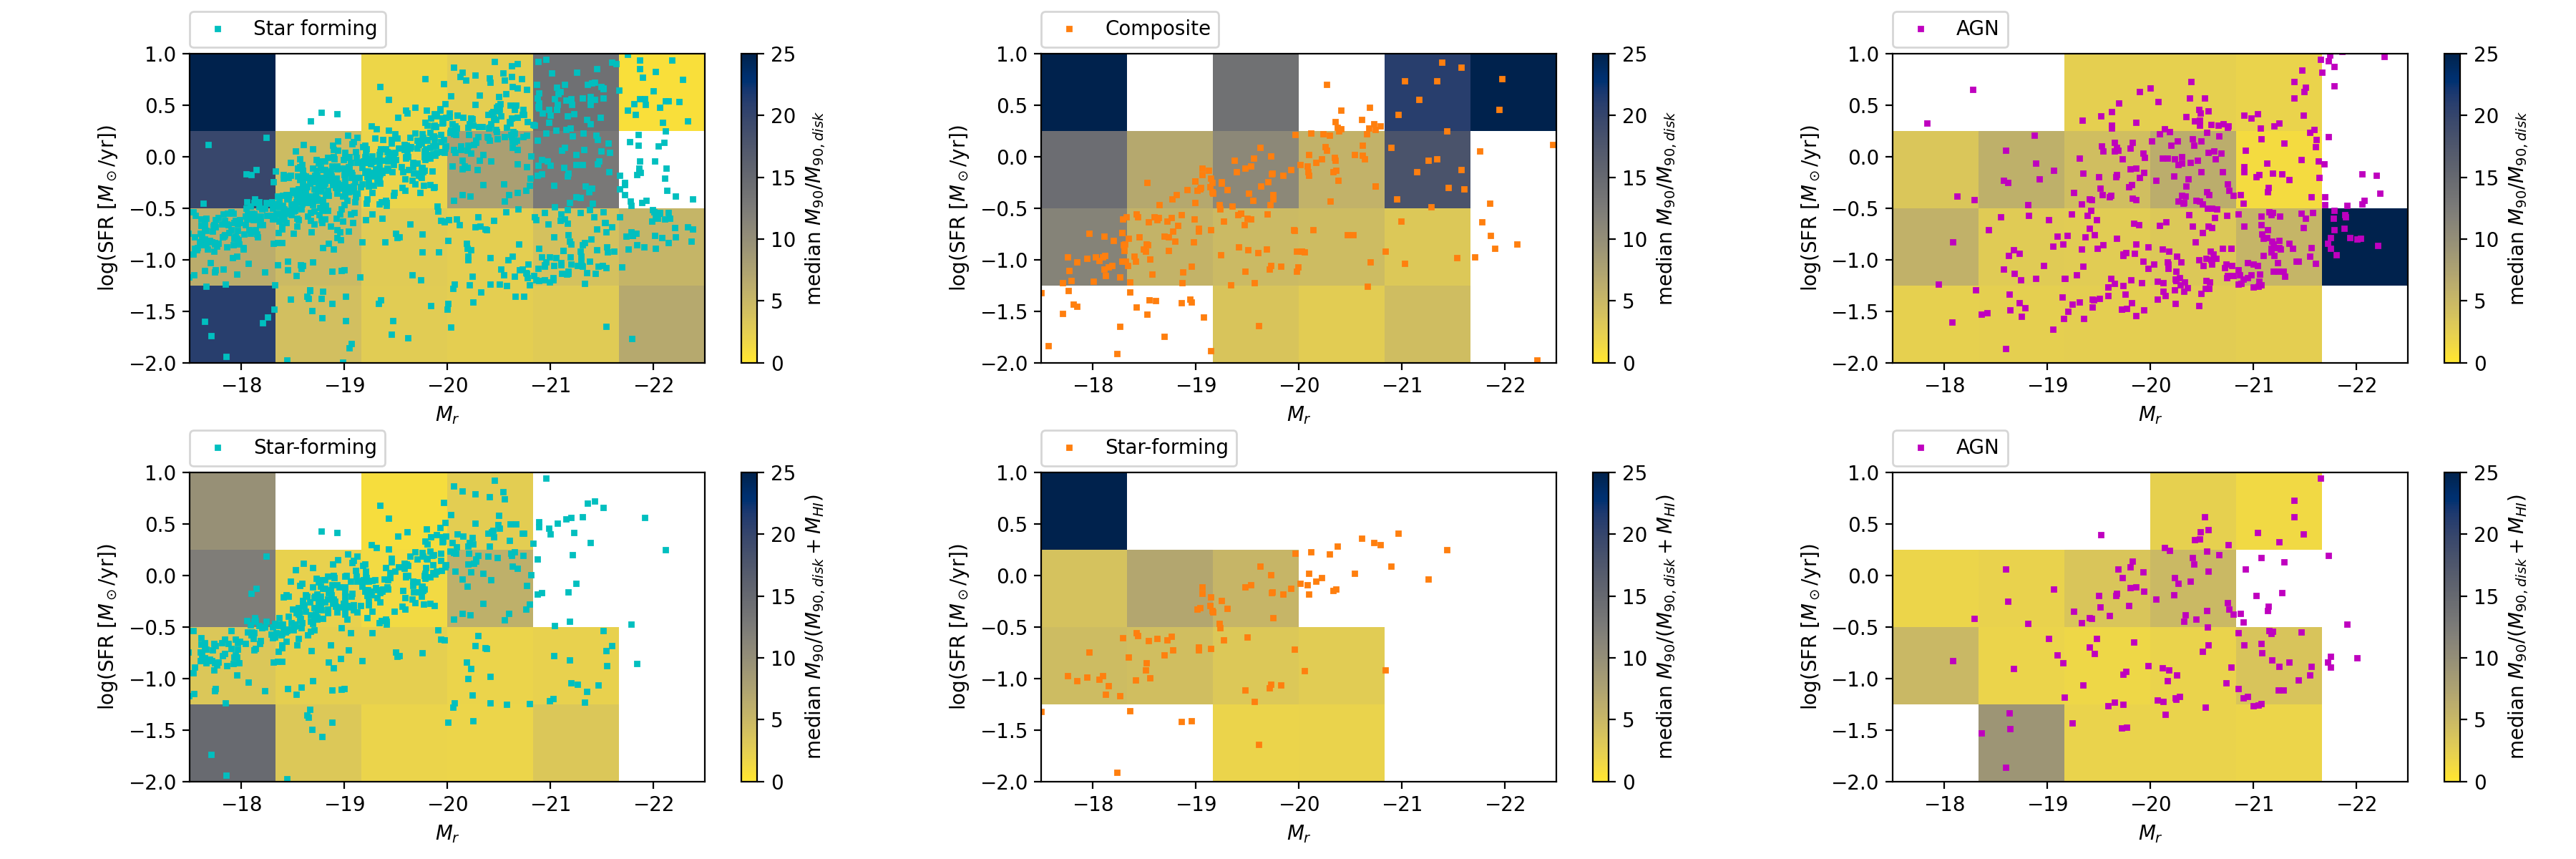

In [47]:
plt.figure(figsize=(18,6))

################################################################################
# Mtot/M*
#-------------------------------------------------------------------------------
plt.subplot(231)

plt.imshow(M90Mdisk_median_SFR_SF, 
           cmap='cividis_r', #'gray_r', 
           vmin=0, vmax=25, origin='lower', 
           extent=(Mr_bins2d[0], Mr_bins2d[-1], SFR_bins2d[-1], SFR_bins2d[0]))

plt.plot(SF['rabsmag'], SF['SFR'], 'cs', markersize=2, label='Star forming')

plt.xlabel('$M_r$')
plt.ylabel('log(SFR [$M_\odot$/yr])')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/M_{90, disk}$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(SFR_bins2d[0], SFR_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################


################################################################################
# Mtot/(M* + MHI)
#-------------------------------------------------------------------------------
plt.subplot(234)

plt.imshow(M90MHI_median_SFR_SF, 
           cmap='cividis_r', #'gray_r', 
           vmin=0, vmax=25, origin='lower', 
           extent=(Mr_bins2d[0], Mr_bins2d[-1], SFR_bins2d[-1], SFR_bins2d[0]))

plt.plot(SF_HI['rabsmag'], SF_HI['SFR'], 'cs', markersize=2, label='Star-forming')

plt.xlabel('$M_r$')
plt.ylabel('log(SFR [$M_\odot$/yr])')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/(M_{90, disk} + M_{HI})$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(SFR_bins2d[0], SFR_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################


################################################################################
# Mtot/M* for composite galaxies
#-------------------------------------------------------------------------------
plt.subplot(232)

plt.imshow(M90Mdisk_median_SFR_comp, 
           cmap='cividis_r', #'gray_r', 
           vmin=0, vmax=25, origin='lower', 
           extent=(Mr_bins2d[0], Mr_bins2d[-1], SFR_bins2d[-1], SFR_bins2d[0]))

plt.plot(comp['rabsmag'], comp['SFR'], 's', c='tab:orange', markersize=2, 
         label='Composite')

plt.xlabel('$M_r$')
plt.ylabel('log(SFR [$M_\odot$/yr])')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/M_{90, disk}$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(SFR_bins2d[0], SFR_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################


################################################################################
# Mtot/(M* + MHI) for composite galaxies
#-------------------------------------------------------------------------------
plt.subplot(235)

plt.imshow(M90MHI_median_SFR_comp, 
           cmap='cividis_r', #'gray_r', 
           vmin=0, vmax=25, origin='lower', 
           extent=(Mr_bins2d[0], Mr_bins2d[-1], SFR_bins2d[-1], SFR_bins2d[0]))

plt.plot(comp_HI['rabsmag'], comp_HI['SFR'], 's', c='tab:orange', markersize=2, 
         label='Star-forming')

plt.xlabel('$M_r$')
plt.ylabel('log(SFR [$M_\odot$/yr])')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/(M_{90, disk} + M_{HI})$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(SFR_bins2d[0], SFR_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################


################################################################################
# Mtot/M* for AGN
#-------------------------------------------------------------------------------
plt.subplot(233)

plt.imshow(M90Mdisk_median_SFR_AGN, 
           cmap='cividis_r', #'gray_r', 
           vmin=0, vmax=25, origin='lower', 
           extent=(Mr_bins2d[0], Mr_bins2d[-1], SFR_bins2d[-1], SFR_bins2d[0]))

plt.plot(AGN['rabsmag'], AGN['SFR'], 'ms', markersize=2, label='AGN')

plt.xlabel('$M_r$')
plt.ylabel('log(SFR [$M_\odot$/yr])')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/M_{90, disk}$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(SFR_bins2d[0], SFR_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################


################################################################################
# Mtot/(M* + MHI) for AGN
#-------------------------------------------------------------------------------
plt.subplot(236)

plt.imshow(M90MHI_median_SFR_AGN, 
           cmap='cividis_r', #'gray_r', 
           vmin=0, vmax=25, origin='lower', 
           extent=(Mr_bins2d[0], Mr_bins2d[-1], SFR_bins2d[-1], SFR_bins2d[0]))

plt.plot(AGN_HI['rabsmag'], AGN_HI['SFR'], 'ms', markersize=2, label='AGN')

plt.xlabel('$M_r$')
plt.ylabel('log(SFR [$M_\odot$/yr])')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/(M_{90, disk} + M_{HI})$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(SFR_bins2d[0], SFR_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################

plt.tight_layout();

<IPython.core.display.Javascript object>


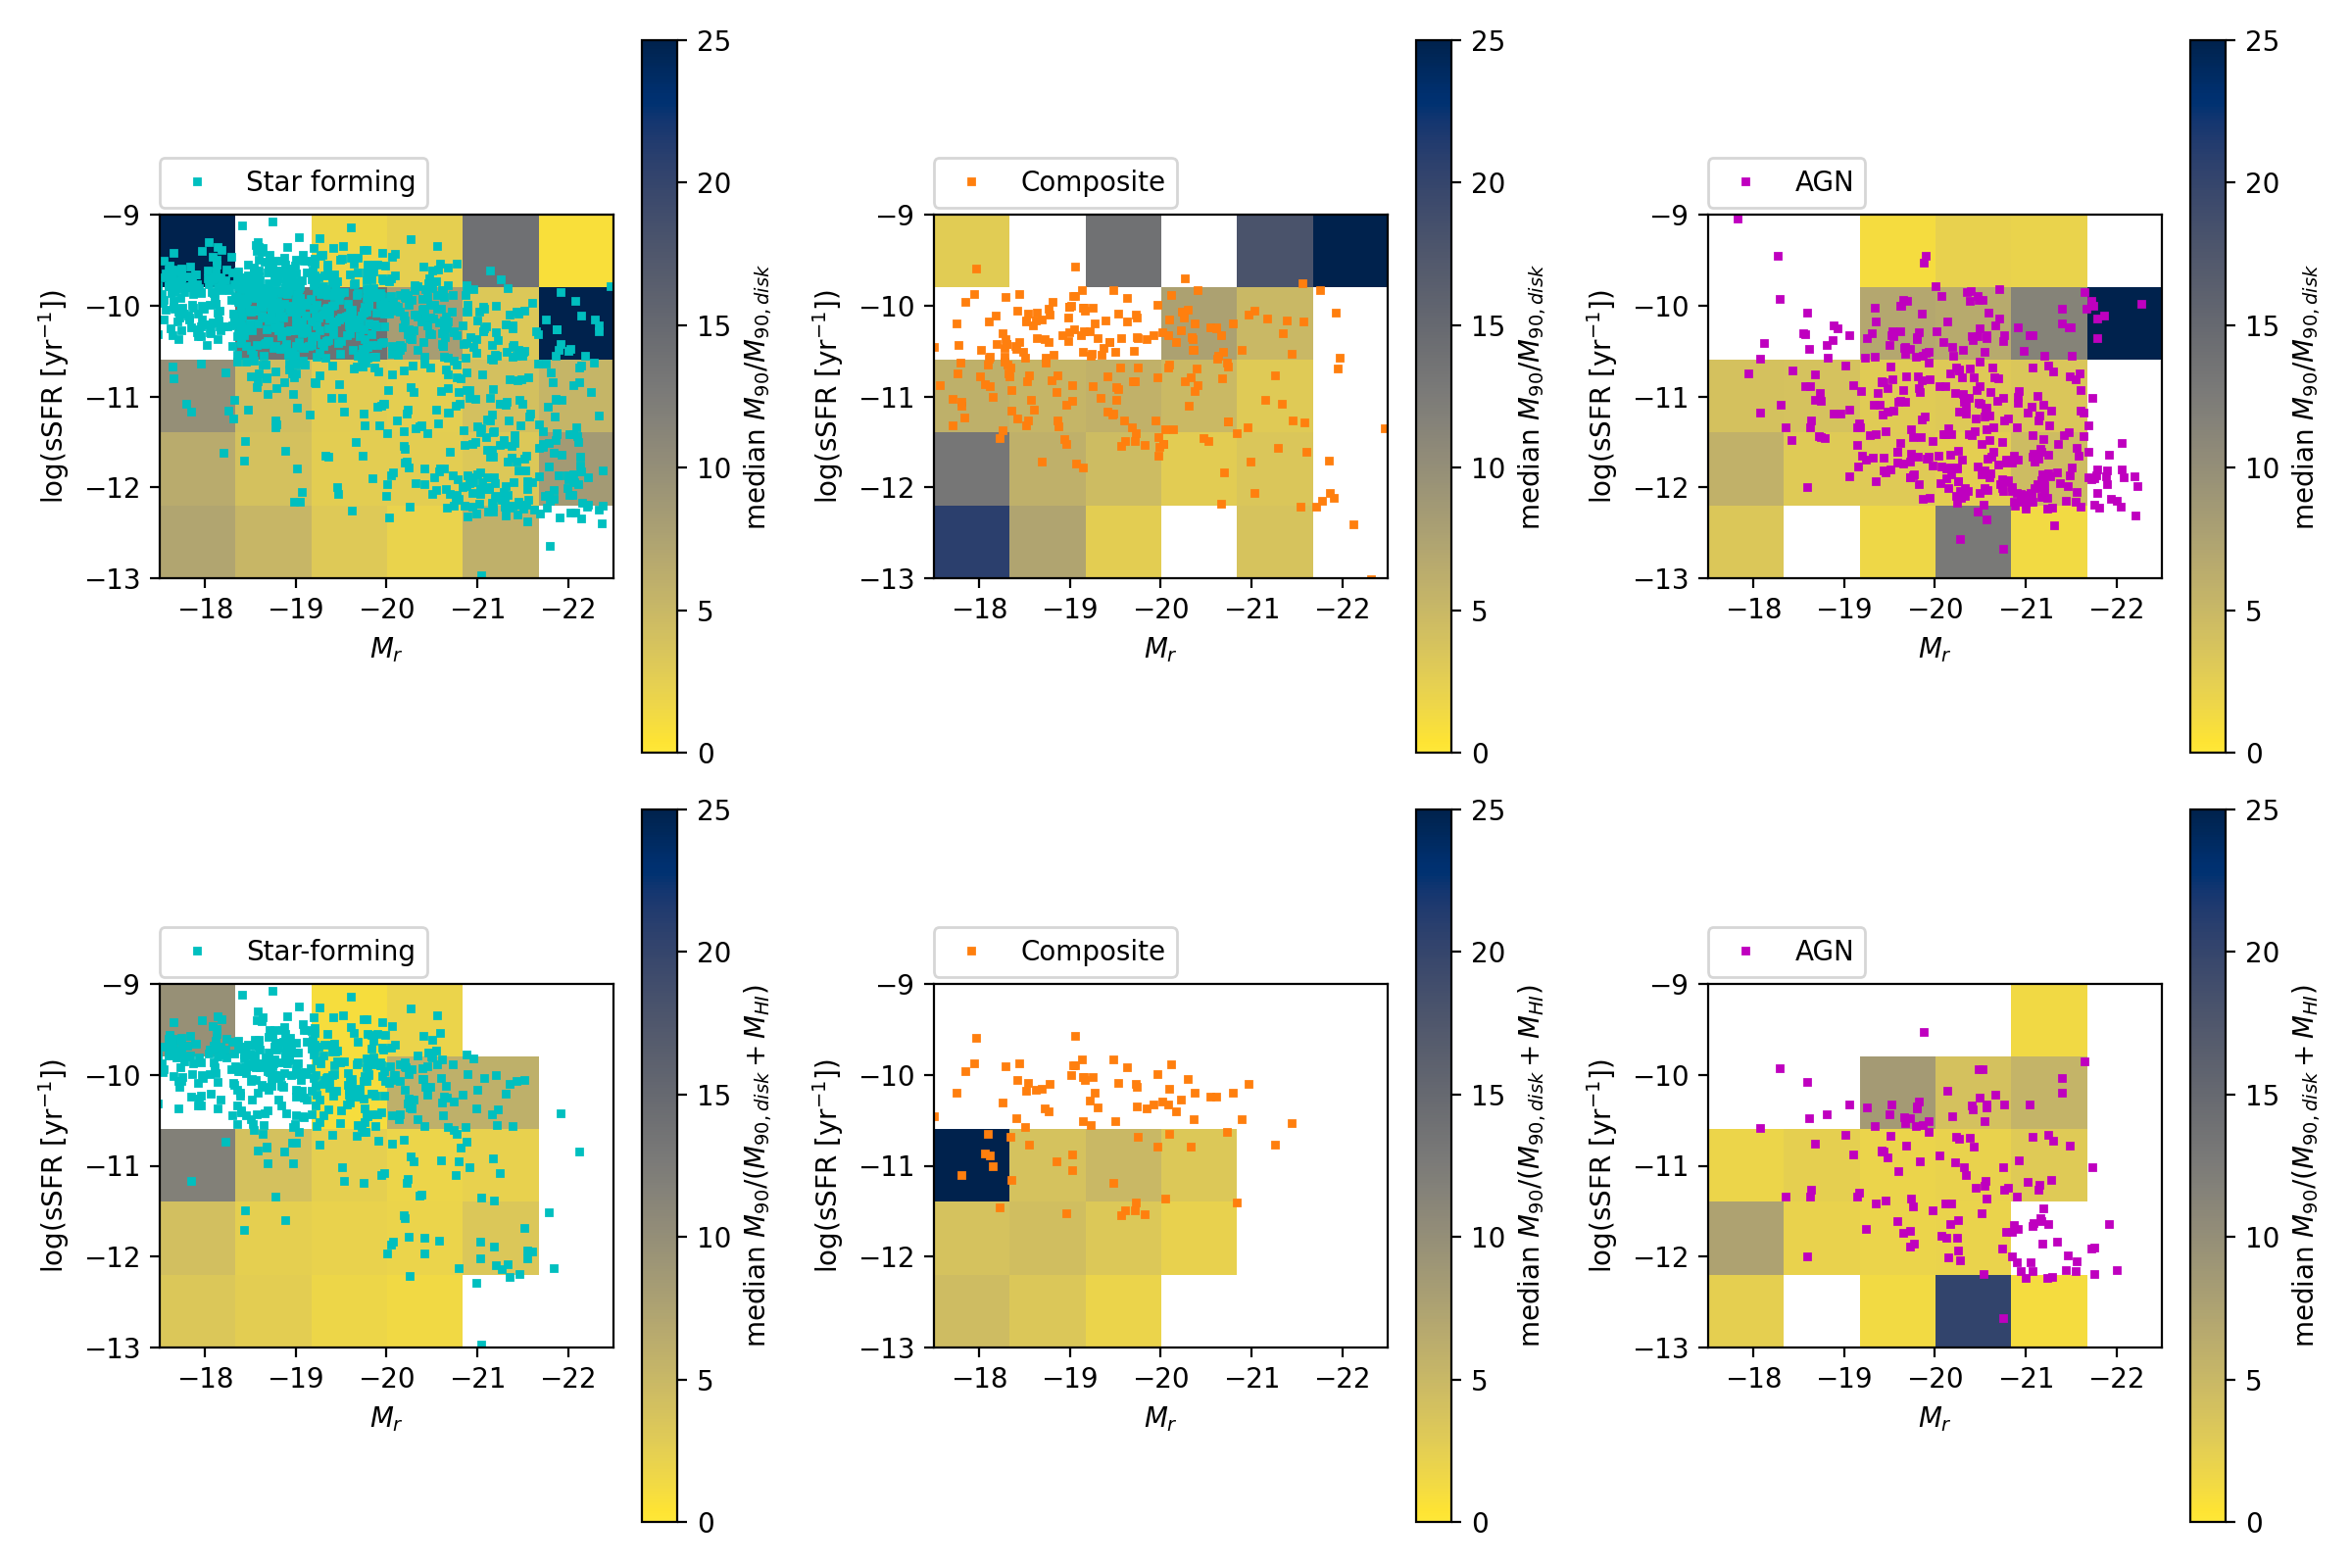

In [48]:
plt.figure(figsize=(12,8))

################################################################################
# Mtot/M* for star-forming galaxies
#-------------------------------------------------------------------------------
plt.subplot(231)

plt.imshow(M90Mdisk_median_sSFR_SF, 
           cmap='cividis_r', #'gray_r', 
           vmin=0, vmax=25, origin='lower', 
           extent=(Mr_bins2d[0], Mr_bins2d[-1], sSFR_bins2d[-1], sSFR_bins2d[0]))

plt.plot(SF['rabsmag'], SF['sSFR'], 'cs', markersize=2, label='Star forming')

plt.xlabel('$M_r$')
plt.ylabel('log(sSFR [yr$^{-1}$])')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/M_{90, disk}$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(sSFR_bins2d[0], sSFR_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################


################################################################################
# Mtot/(M* + MHI) for star-forming galaxies
#-------------------------------------------------------------------------------
plt.subplot(234)

plt.imshow(M90MHI_median_sSFR_SF, 
           cmap='cividis_r', #'gray_r', 
           vmin=0, vmax=25, origin='lower', 
           extent=(Mr_bins2d[0], Mr_bins2d[-1], sSFR_bins2d[-1], sSFR_bins2d[0]))

plt.plot(SF_HI['rabsmag'], SF_HI['sSFR'], 'cs', markersize=2, label='Star-forming')

plt.xlabel('$M_r$')
plt.ylabel('log(sSFR [yr$^{-1}$])')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/(M_{90, disk} + M_{HI})$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(sSFR_bins2d[0], sSFR_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################


################################################################################
# Mtot/M* for composite galaxies
#-------------------------------------------------------------------------------
plt.subplot(232)

plt.imshow(M90Mdisk_median_sSFR_comp, 
           cmap='cividis_r', #'gray_r', 
           vmin=0, vmax=25, origin='lower', 
           extent=(Mr_bins2d[0], Mr_bins2d[-1], sSFR_bins2d[-1], sSFR_bins2d[0]))

plt.plot(comp['rabsmag'], comp['sSFR'], 's', c='tab:orange', markersize=2, 
         label='Composite')

plt.xlabel('$M_r$')
plt.ylabel('log(sSFR [yr$^{-1}$])')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/M_{90, disk}$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(sSFR_bins2d[0], sSFR_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################


################################################################################
# Mtot/(M* + MHI) for composite galaxies
#-------------------------------------------------------------------------------
plt.subplot(235)

plt.imshow(M90MHI_median_sSFR_comp, 
           cmap='cividis_r', #'gray_r', 
           vmin=0, vmax=25, origin='lower', 
           extent=(Mr_bins2d[0], Mr_bins2d[-1], sSFR_bins2d[-1], sSFR_bins2d[0]))

plt.plot(comp_HI['rabsmag'], comp_HI['sSFR'], 's', c='tab:orange', markersize=2, 
         label='Composite')

plt.xlabel('$M_r$')
plt.ylabel('log(sSFR [yr$^{-1}$])')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/(M_{90, disk} + M_{HI})$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(sSFR_bins2d[0], sSFR_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################


################################################################################
# Mtot/M* for AGN
#-------------------------------------------------------------------------------
plt.subplot(233)

plt.imshow(M90Mdisk_median_sSFR_AGN, 
           cmap='cividis_r', #'gray_r', 
           vmin=0, vmax=25, origin='lower', 
           extent=(Mr_bins2d[0], Mr_bins2d[-1], sSFR_bins2d[-1], sSFR_bins2d[0]))

plt.plot(AGN['rabsmag'], AGN['sSFR'], 'ms', markersize=2, label='AGN')

plt.xlabel('$M_r$')
plt.ylabel('log(sSFR [yr$^{-1}$])')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/M_{90, disk}$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(sSFR_bins2d[0], sSFR_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################


################################################################################
# Mtot/(M* + MHI) for AGN
#-------------------------------------------------------------------------------
plt.subplot(236)

plt.imshow(M90MHI_median_sSFR_AGN, 
           cmap='cividis_r',#'gray_r', 
           vmin=0, vmax=25, origin='lower', 
           extent=(Mr_bins2d[0], Mr_bins2d[-1], sSFR_bins2d[-1], sSFR_bins2d[0]))

plt.plot(AGN_HI['rabsmag'], AGN_HI['sSFR'], 'ms', markersize=2, label='AGN')

plt.xlabel('$M_r$')
plt.ylabel('log(sSFR [yr$^{-1}$])')

cbar = plt.colorbar()
cbar.ax.set_ylabel('median $M_{90}/(M_{90, disk} + M_{HI})$')

plt.xlim(Mr_bins2d[-1], Mr_bins2d[0])
plt.ylim(sSFR_bins2d[0], sSFR_bins2d[-1])

plt.legend(bbox_to_anchor=(0,1.02,1,0.102), loc='lower left', ncol=1, borderaxespad=0)
################################################################################

plt.tight_layout();

In [49]:
good_galaxies

<Table length=1988>
MaNGA_plate MaNGA_IFU NSA_plate ... M90_MdiskHI_ratio       M90_vis      
   int64      int64     int64   ...      float64            float64      
----------- --------- --------- ... ------------------ ------------------
       8465      1901      1281 ...  9.370251187734311 10.270850556238864
       8249      3702       899 ... 0.5526932673724017 10.174778419165506
       9027      9101      1420 ... 1.7171492983784908  10.31818514955382
       8247     12705      1200 ...  6.689524536494902 10.195344267160051
       9027     12703      1420 ... 20.032635933217133  10.64561005552243
       9027      3701      1420 ...                nan                nan
        ...       ...       ... ...                ...                ...
       8548      6103       622 ... 1.0882452512737864  9.833909095193581
       9029      3702       816 ... 29.393133389014725 10.649926764012005
       9031      3704      1169 ...                nan                nan
       8134     12704      3665 ...                nan                nan
       9024     12704      1647 ...                nan                nan
       8997      1901       879 ...                nan                nan
       8133      6101      1865 ...                nan                nan